# Introduction

The aim of this project is building and optimizing a neural network model to predict a target variable based on 21 feature columns. The dataset comprises a training set of 22,500 rows and a test set of 7,500 rows. The primary goal is to develop a model that accurately predicts the target variable while adhering to competition requirements.

This notebook will follow a systematic approach, beginning with an exploration of the problem and the dataset. We will perform Exploratory Data Analysis (EDA) to understand the data's structure and identify potential issues such as missing values, irrelevant features, and categorical variables requiring encoding. Subsequently, a neural network will be built and fine-tuned, employing techniques such as regularization, dropout, and hyperparameter tuning to enhance model performance.

Evaluation will be conducted using the F1 score with a micro-average parameter, as specified by the competition guidelines. Clear explanations and visualizations will accompany each step to ensure transparency and reproducibility. Ultimately, this project aims to produce a robust, high-performing model suitable for submission.

In [1]:
import pandas as pd
import numpy as np 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # To avoid some unnecessary errors that have no effect on our code execution.

df = pd.read_csv('/kaggle/input/math482-2024-2025-1-hw-04/train.csv')

df.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,target
0,1,0.94,D2,B1,NaN,1.88,0.40,NaN,1.33,NaN,...,-3.64,r,1.27,-0.87,-1.20,0.29,A2,ad,0.34,1
1,2,6.02,D3,B1,1.0,1.12,0.33,0.25,1.96,xy,...,-3.02,s,0.86,0.11,-14.86,0.66,A2,ae,0.31,5
2,3,2.63,D1,B6,2.0,1.60,0.35,0.43,2.42,xy,...,-3.22,q,0.19,-6.30,-64.38,0.57,A5,ac,0.18,4
3,4,1.83,NaN,B4,1.0,0.98,0.44,0.15,2.09,xy,...,-2.85,s,1.41,-3.09,NaN,0.56,A1,aa,1.46,3
4,5,0.34,D3,B6,0.0,0.93,0.53,0.26,4.30,xy,...,-6.11,u,0.57,-3.28,-1.01,0.38,A3,ad,1.79,5


At first glance, the dataset contains some missing values. Additionally, it consists of both numerical and categorical variables, requiring tailored preprocessing for effective analysis.

# Exploratory Data Analysis

We start EDA by exploring the dataset's structure, size, and data types, followed by examining summary statistics for numerical and categorical variables. Next, we handle missing values to ensure data completeness. We visualize data distributions and relationships using histograms, scatter plots, and heatmaps. Outliers are detected and addressed using statistical methods like IQR or Z-scores. Categorical variables are encoded to make them suitable for analysis. Redundant features are identified through correlation analysis, and highly correlated ones are removed. We then apply transformations like scaling and normalization to numerical features. In feature engineering, we create or modify features to enhance the dataset. Irrelevant features are identified using domain knowledge and feature selection methods and removed. Finally, we analyze the target variable and split the dataset into training, validation, and test sets for unbiased evaluation.

In [2]:
# Some import for visualization

import matplotlib.pyplot as plt
import seaborn as sns

## Summary Statistics

In [3]:
df.describe()

,id,feature_01,feature_04,feature_05,feature_06,feature_07,feature_08,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_21,target
count,22500.000000,20096.000000,20141.000000,20455.000000,19557.000000,19745.00000,20973.000000,19698.000000,19869.000000,19417.000000,20853.000000,20289.000000,19406.000000,21219.000000,20557.000000,22500.000000
mean,11250.500000,6.239823,7.113022,4.352539,1.162647,3.42410,20.395801,-4.883125,-5.699943,-22.232416,9.371157,-14.442898,-7.817956,2.188494,16.879567,2.740044
std,6495.334864,32.572165,33.501994,21.647838,4.724951,10.17402,85.158896,22.815663,22.032648,80.880036,43.593488,55.097175,33.486274,7.409390,84.358346,1.717847
min,1.000000,0.000000,0.000000,0.020000,0.010000,0.03000,0.000000,-295.390000,-222.630000,-548.960000,0.000000,-417.980000,-373.920000,0.030000,0.020000,0.000000
25%,5625.750000,0.610000,0.000000,0.520000,0.280000,0.29000,0.660000,-1.740000,-1.820000,-5.170000,0.620000,-5.080000,-1.800000,0.280000,0.550000,1.000000
50%,11250.500000,1.460000,1.000000,1.040000,0.380000,0.39000,1.650000,-0.990000,-1.030000,-3.310000,1.490000,-3.300000,-1.040000,0.390000,1.130000,3.000000
75%,16875.250000,3.002500,2.000000,2.160000,0.490000,0.52000,3.540000,-0.270000,-0.300000,-1.520000,3.090000,-1.460000,-0.300000,0.510000,2.530000,5.000000
max,22500.000000,786.250000,465.410000,659.360000,54.550000,68.19000,1837.720000,141.210000,143.410000,24.490000,939.450000,18.620000,192.320000,64.880000,2783.070000,5.000000


The values for many features show a significant range between the minimum and maximum. However, the mean value is far from either the maximum or minimum, indicating that our dataset likely contains outliers. We will aim to identify these outliers using appropriate mathematical methods and demonstrate them through visualization techniques. Also, we cannot see some features such as feature_10 because of the fact that feature_10 is probably a categorical feature. Now, we identify numerical and categorical features.

## Handling Numerical & Categorical Features

In [4]:
df.dtypes

id              int64
feature_01    float64
feature_02     object
feature_03     object
feature_04    float64
feature_05    float64
feature_06    float64
feature_07    float64
feature_08    float64
feature_09     object
feature_10     object
feature_11    float64
feature_12    float64
feature_13    float64
feature_14     object
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19     object
feature_20     object
feature_21    float64
target          int64
dtype: object

There are both categorical and numerical features. Now, we will create separate lists for categorical and numerical variables because these two types of data require different preprocessing steps. Categorical variables need encoding (e.g. one-hot or label encoding) to be used in our models, while numerical variables often require scaling or normalization. By separating them, we can streamline the data preprocessing workflow and apply the appropriate transformations to each type efficiently.

In [5]:
# Identify the numeraical and categorical features and separate them into different lists.
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['feature_02', 'feature_03', 'feature_09', 'feature_10', 'feature_14', 'feature_19', 'feature_20']
Numerical Features: ['id', 'feature_01', 'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_21', 'target']


Now, to better understand the distributions and structures of the data in the features, we will create some visualizations. First, we will plot histograms for the numerical features. This will provide us with insights into the data's distribution.

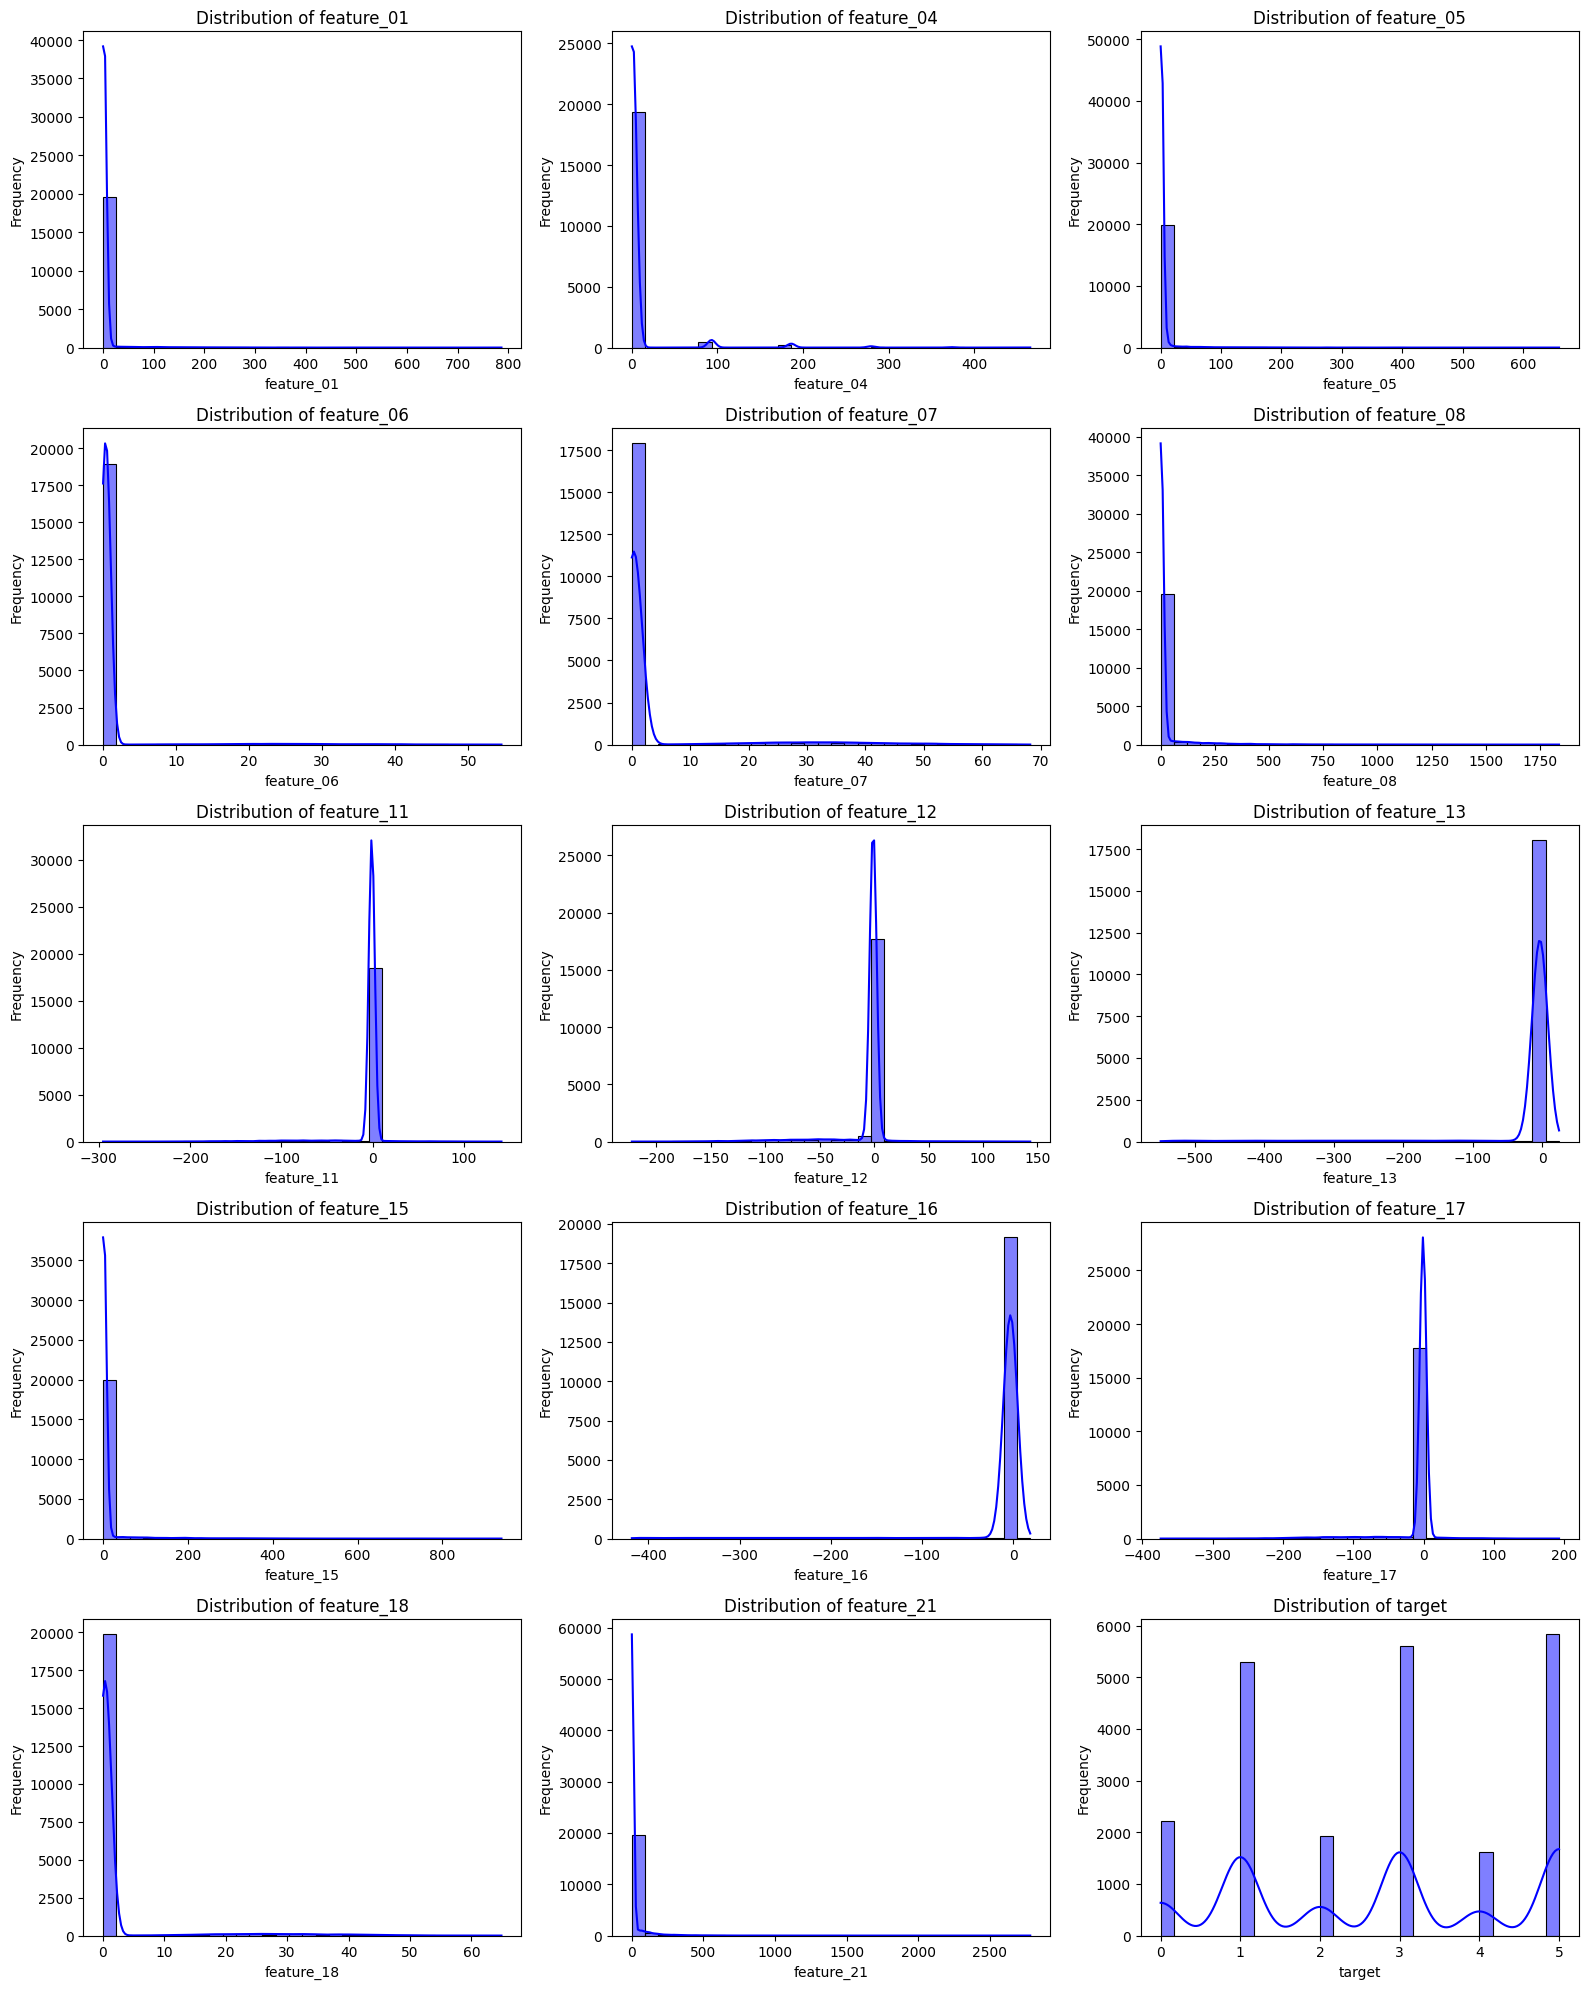

In [6]:
numerical_features = [col for col in numerical_features if col.lower() != "id"]

num_features = len(numerical_features)
cols = 3  
rows = (num_features + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  

for i, col in enumerate(numerical_features):
    ax = axes[i // cols, i % cols] 
    sns.histplot(df[col], kde=True, bins=30, color="blue", ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")


for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

When we examine the histograms, we notice that most of them are either skewed to the right or left. A few are concentrated around the center. This observation suggests that the data in the features is heavily concentrated in specific ranges. This is another indication of the presence of many outliers. However, since our data is abstract and we don't know the characteristics of the features, determining the range of outliers is somewhat uncertain.

If we simply apply the classic IQR method and remove all outliers, and these outliers actually represent valid data points, our model might fail to adapt properly. For this reason, it seems that a more detailed outlier analysis is required. 

We will address this situation in greater detail in the outlier section.

Now let's identify the variables of categorical features.

In [7]:
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values which are: {list(df[col].unique())}")


feature_02: 4 unique values which are: ['D2', 'D3', 'D1', nan, 'D4']
feature_03: 6 unique values which are: ['B1', 'B6', 'B4', nan, 'B5', 'B2', 'B3']
feature_09: 4 unique values which are: [nan, 'xy', 'xx', 'yx', 'yy']
feature_10: 6 unique values which are: [nan, 'C5', 'C3', 'C6', 'C2', 'C1', 'C4']
feature_14: 6 unique values which are: ['r', 's', 'q', 'u', 'p', 't', nan]
feature_19: 6 unique values which are: ['A2', 'A5', 'A1', 'A3', 'A4', nan, 'A6']
feature_20: 5 unique values which are: ['ad', 'ae', 'ac', 'aa', nan, 'ab']


There are some ordered and non-ordered categorical features.
* Ordered features = ['feature_02', 'feature_03', 'feature_10', 'feature_19']
* Non-ordered features = ['feature_09', 'feature_14', 'feature_20']

In [8]:
ordered_features = ['feature_02', 'feature_03', 'feature_10', 'feature_19']
non_ordered_features = ['feature_09', 'feature_14', 'feature_20']

Now,  use pie charts to visualize the distribution of categorical variables, helping to identify dominant categories, detect imbalances, and understand proportions for better preprocessing decisions.

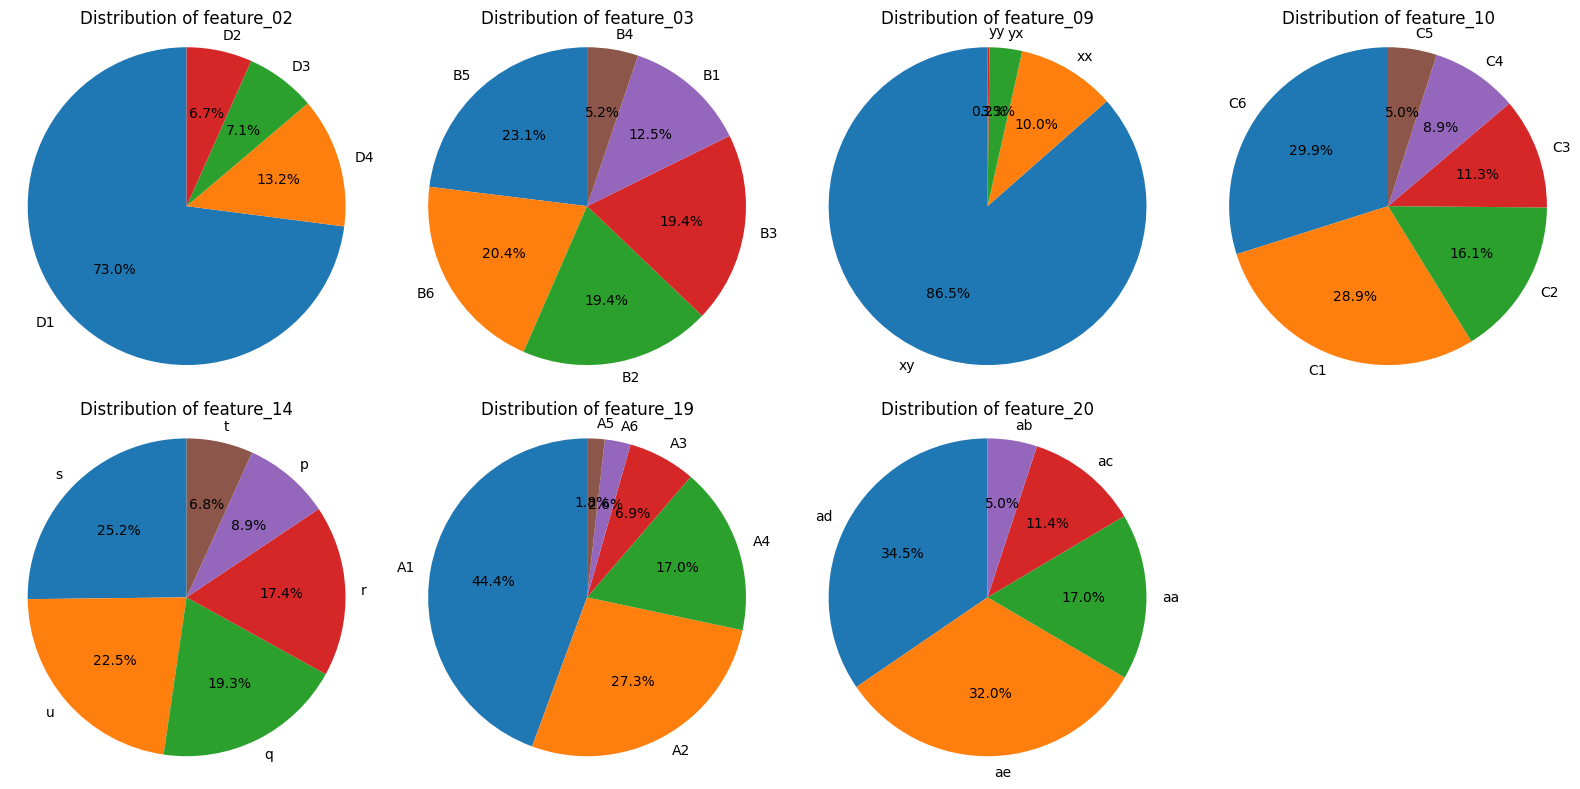

In [9]:
cols = 4 # Four pie chart in each line
num_features = len(categorical_features)
rows = (num_features + cols - 1) // cols  # calculate the line number

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  
axes = axes.flatten()  


for i, col in enumerate(categorical_features):
    values = df[col].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].axis('equal')  


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We observe that certain variables are highly dominant in some categories; for example, the variable **xy** in **feature_09**.

When a dominant category represents a large portion of a feature, the other categories in that feature may provide very little information to the model or be entirely ignored.

For instance, if 86% of a feature belongs to a single category, the remaining 14% could have a significant impact on the target variable, but this information might be overshadowed by the dominant category. A dominant category can lead to the model disregarding minority categories, potentially reducing its ability to generalize effectively.

An imbalanced distribution in a feature can mislead the model during training. Instead of learning the information related to minority variables, the model may default to selecting the dominant variable. This is crucial because if the model learns this imbalance, it may focus all its predictions on the dominant category. This can lead to poor performance, especially in classification problems. However, in many cases, the performance of our model will be quite similar. First, I will proceed without making any changes or applying any transformations. If I achieve a very good result, I will not make any modifications.

## Handling Missing Values

In [10]:
df.isnull().sum()

id               0
feature_01    2404
feature_02    2888
feature_03    2467
feature_04    2359
feature_05    2045
feature_06    2943
feature_07    2755
feature_08    1527
feature_09    2618
feature_10    2155
feature_11    2802
feature_12    2631
feature_13    3083
feature_14    1243
feature_15    1647
feature_16    2211
feature_17    3094
feature_18    1281
feature_19    1412
feature_20    1371
feature_21    1943
target           0
dtype: int64

It seems that there are quite a lot of outliers, so I will use median values to fill in the missing numeric values. This is because, in numeric features, the values are heavily concentrated within a certain range, and using the median helps avoid disrupting this concentration. For filling missing categorical features, I will use a random approach for those with balanced distributions and the median for those with unbalanced distributions. This way, we can preserve the existing distribution.

### Handling in Categorical Features

First, I will fill the misising values for unbalanced distributed categorical features.

In [11]:
# Create a list contains the features that will be filled with their mode value.
feature_fill_w_mode = ['feature_02', 'feature_09']

# Fill the missing values for unbalanced categroical features.
for feature in feature_fill_w_mode:
    mode_value = df[feature].mode()[0]  # Mode value
    df[feature].fillna(mode_value, inplace=True)

Other categorical features appear to have balanced distributions. Considering the missing value percentage is around 5-10%, filling the missing values with the mode might disrupt this balance. Therefore, using random sampling to fill the missing values seems to be a more reasonable approach.


Random sampling fills missing values by randomly selecting one of the existing values in the feature (from non-missing values). This ensures that the original distribution of the data is preserved without introducing bias.

While filling in the missing values randomly, we will save our data into two different dictionaries to demonstrate that there is no change in the distribution. Afterward, we will compare these datasets.

In [12]:
features_fill_w_random = [ 'feature_03',  'feature_10',  'feature_14',  'feature_19',  'feature_20']

feature_distributions_with_missingvalues = {}

for col in features_fill_w_random:
    value_counts = df[col].value_counts(normalize=True) * 100  
    feature_distributions_with_missingvalues[col] = value_counts.to_dict() 

In [13]:
np.random.seed(28)

for col in features_fill_w_random:
    df[col] = df[col].apply(lambda x: np.random.choice(df[col].dropna().unique()) if pd.isnull(x) else x)

In [14]:
feature_distributions_without_missingvalues = {}

for col in features_fill_w_random:
    value_counts = df[col].value_counts(normalize=True) * 100  
    feature_distributions_without_missingvalues[col] = value_counts.to_dict() 

In [15]:
for feature in feature_distributions_with_missingvalues.keys():
    original = feature_distributions_with_missingvalues[feature]  
    updated = feature_distributions_without_missingvalues[feature]  
    
    print(f"Feature: {feature}")
    for category in original.keys():
        original_value = original.get(category, 0)
        updated_value = updated.get(category, 0)
        difference = abs(original_value - updated_value)  
        print(f"  {category}: Original = {original_value:.4f}, Updated = {updated_value:.4f}, Difference = {difference:.4f}")
    print("\n")

Feature: feature_03
  B5: Original = 23.0520, Updated = 22.2711, Difference = 0.7809
  B6: Original = 20.4063, Updated = 19.9067, Difference = 0.4997
  B2: Original = 19.4230, Updated = 19.1911, Difference = 0.2318
  B3: Original = 19.4130, Updated = 19.2178, Difference = 0.1952
  B1: Original = 12.5144, Updated = 12.8533, Difference = 0.3390
  B4: Original = 5.1914, Updated = 6.5600, Difference = 1.3686


Feature: feature_10
  C6: Original = 29.8943, Updated = 28.6844, Difference = 1.2099
  C1: Original = 28.9014, Updated = 27.7067, Difference = 1.1948
  C2: Original = 16.0727, Updated = 15.9956, Difference = 0.0772
  C3: Original = 11.3099, Updated = 11.7822, Difference = 0.4723
  C4: Original = 8.8670, Updated = 9.6000, Difference = 0.7330
  C5: Original = 4.9545, Updated = 6.2311, Difference = 1.2766


Feature: feature_14
  s: Original = 25.1870, Updated = 24.6444, Difference = 0.5426
  u: Original = 22.5008, Updated = 22.2133, Difference = 0.2875
  q: Original = 19.2737, Updated =

We successfully managed to preserve the distributions approximately.

### Handling in Numerical Features

Based on the histograms above for the numerical features, filling missing values with the median for numerical features seems logical. This approach minimizes the impact of outliers on skewed distributions and better preserves the overall structure of the data.

In [16]:
for col in numerical_features:
    if df[col].isnull().sum() > 0:  
        df[col].fillna(df[col].median(), inplace=True)

In [17]:
print(df.isnull().sum())

id            0
feature_01    0
feature_02    0
feature_03    0
feature_04    0
feature_05    0
feature_06    0
feature_07    0
feature_08    0
feature_09    0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
target        0
dtype: int64


All missing values have been successfully handled. Numerical features were filled with their median values to preserve the data's structure and minimize the impact of outliers. The dataset is now complete and ready for further preprocessing. So, which encoding method should we choose now?

## Encoding

We chose One-Hot Encoding to prevent neural network models from misinterpreting categorical features as having an ordinal relationship. This method ensures that categories are treated as independent entities by creating separate binary columns, making it more suitable for the model. It improves feature representation and ensures accurate model performance.

We will use one-hot encoding for non-ordered features and label encoding for ordered features.

In [18]:
one_hot_encoded_df = pd.get_dummies(df[non_ordered_features], drop_first=True)

df = pd.concat([df, one_hot_encoded_df], axis=1)

df.drop(columns=non_ordered_features, inplace=True)

boolean_columns = df.select_dtypes(include=['bool']).columns

df[boolean_columns] = df[boolean_columns].astype(int)

df.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_10,...,feature_09_yy,feature_14_q,feature_14_r,feature_14_s,feature_14_t,feature_14_u,feature_20_ab,feature_20_ac,feature_20_ad,feature_20_ae
0,1,0.94,D2,B1,1.0,1.88,0.40,0.39,1.33,C3,...,0,0,1,0,0,0,0,0,1,0
1,2,6.02,D3,B1,1.0,1.12,0.33,0.25,1.96,C5,...,0,0,0,1,0,0,0,0,0,1
2,3,2.63,D1,B6,2.0,1.60,0.35,0.43,2.42,C3,...,0,1,0,0,0,0,0,1,0,0
3,4,1.83,D1,B4,1.0,0.98,0.44,0.15,2.09,C3,...,0,0,0,1,0,0,0,0,0,0
4,5,0.34,D3,B6,0.0,0.93,0.53,0.26,4.30,C6,...,0,0,0,0,0,1,0,0,1,0


Label Encoding is a technique used to convert categorical data into numerical values in an appropriate format. With this method, each unique class of the categorical variable is assigned a number. Label Encoding is commonly used for categorical variables where there is no inherent order or relationship between the categories.

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ordered_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le 

df.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_10,...,feature_09_yy,feature_14_q,feature_14_r,feature_14_s,feature_14_t,feature_14_u,feature_20_ab,feature_20_ac,feature_20_ad,feature_20_ae
0,1,0.94,1,0,1.0,1.88,0.40,0.39,1.33,2,...,0,0,1,0,0,0,0,0,1,0
1,2,6.02,2,0,1.0,1.12,0.33,0.25,1.96,4,...,0,0,0,1,0,0,0,0,0,1
2,3,2.63,0,5,2.0,1.60,0.35,0.43,2.42,2,...,0,1,0,0,0,0,0,1,0,0
3,4,1.83,0,3,1.0,0.98,0.44,0.15,2.09,2,...,0,0,0,1,0,0,0,0,0,0
4,5,0.34,2,5,0.0,0.93,0.53,0.26,4.30,5,...,0,0,0,0,0,1,0,0,1,0


The target column is not in the end of the dataframe.

In [20]:
target_column = 'target'
columns = [col for col in df.columns if col != target_column] + [target_column]
df = df[columns]

df.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_10,...,feature_14_q,feature_14_r,feature_14_s,feature_14_t,feature_14_u,feature_20_ab,feature_20_ac,feature_20_ad,feature_20_ae,target
0,1,0.94,1,0,1.0,1.88,0.40,0.39,1.33,2,...,0,1,0,0,0,0,0,1,0,1
1,2,6.02,2,0,1.0,1.12,0.33,0.25,1.96,4,...,0,0,1,0,0,0,0,0,1,5
2,3,2.63,0,5,2.0,1.60,0.35,0.43,2.42,2,...,1,0,0,0,0,0,1,0,0,4
3,4,1.83,0,3,1.0,0.98,0.44,0.15,2.09,2,...,0,0,1,0,0,0,0,0,0,3
4,5,0.34,2,5,0.0,0.93,0.53,0.26,4.30,5,...,0,0,0,0,1,0,0,1,0,5


## Redundant Features

To identify redundant features, we will first look at the correlation matrix, which will show how correlated a feature is with another. Then, we will analyze multicollinearity.

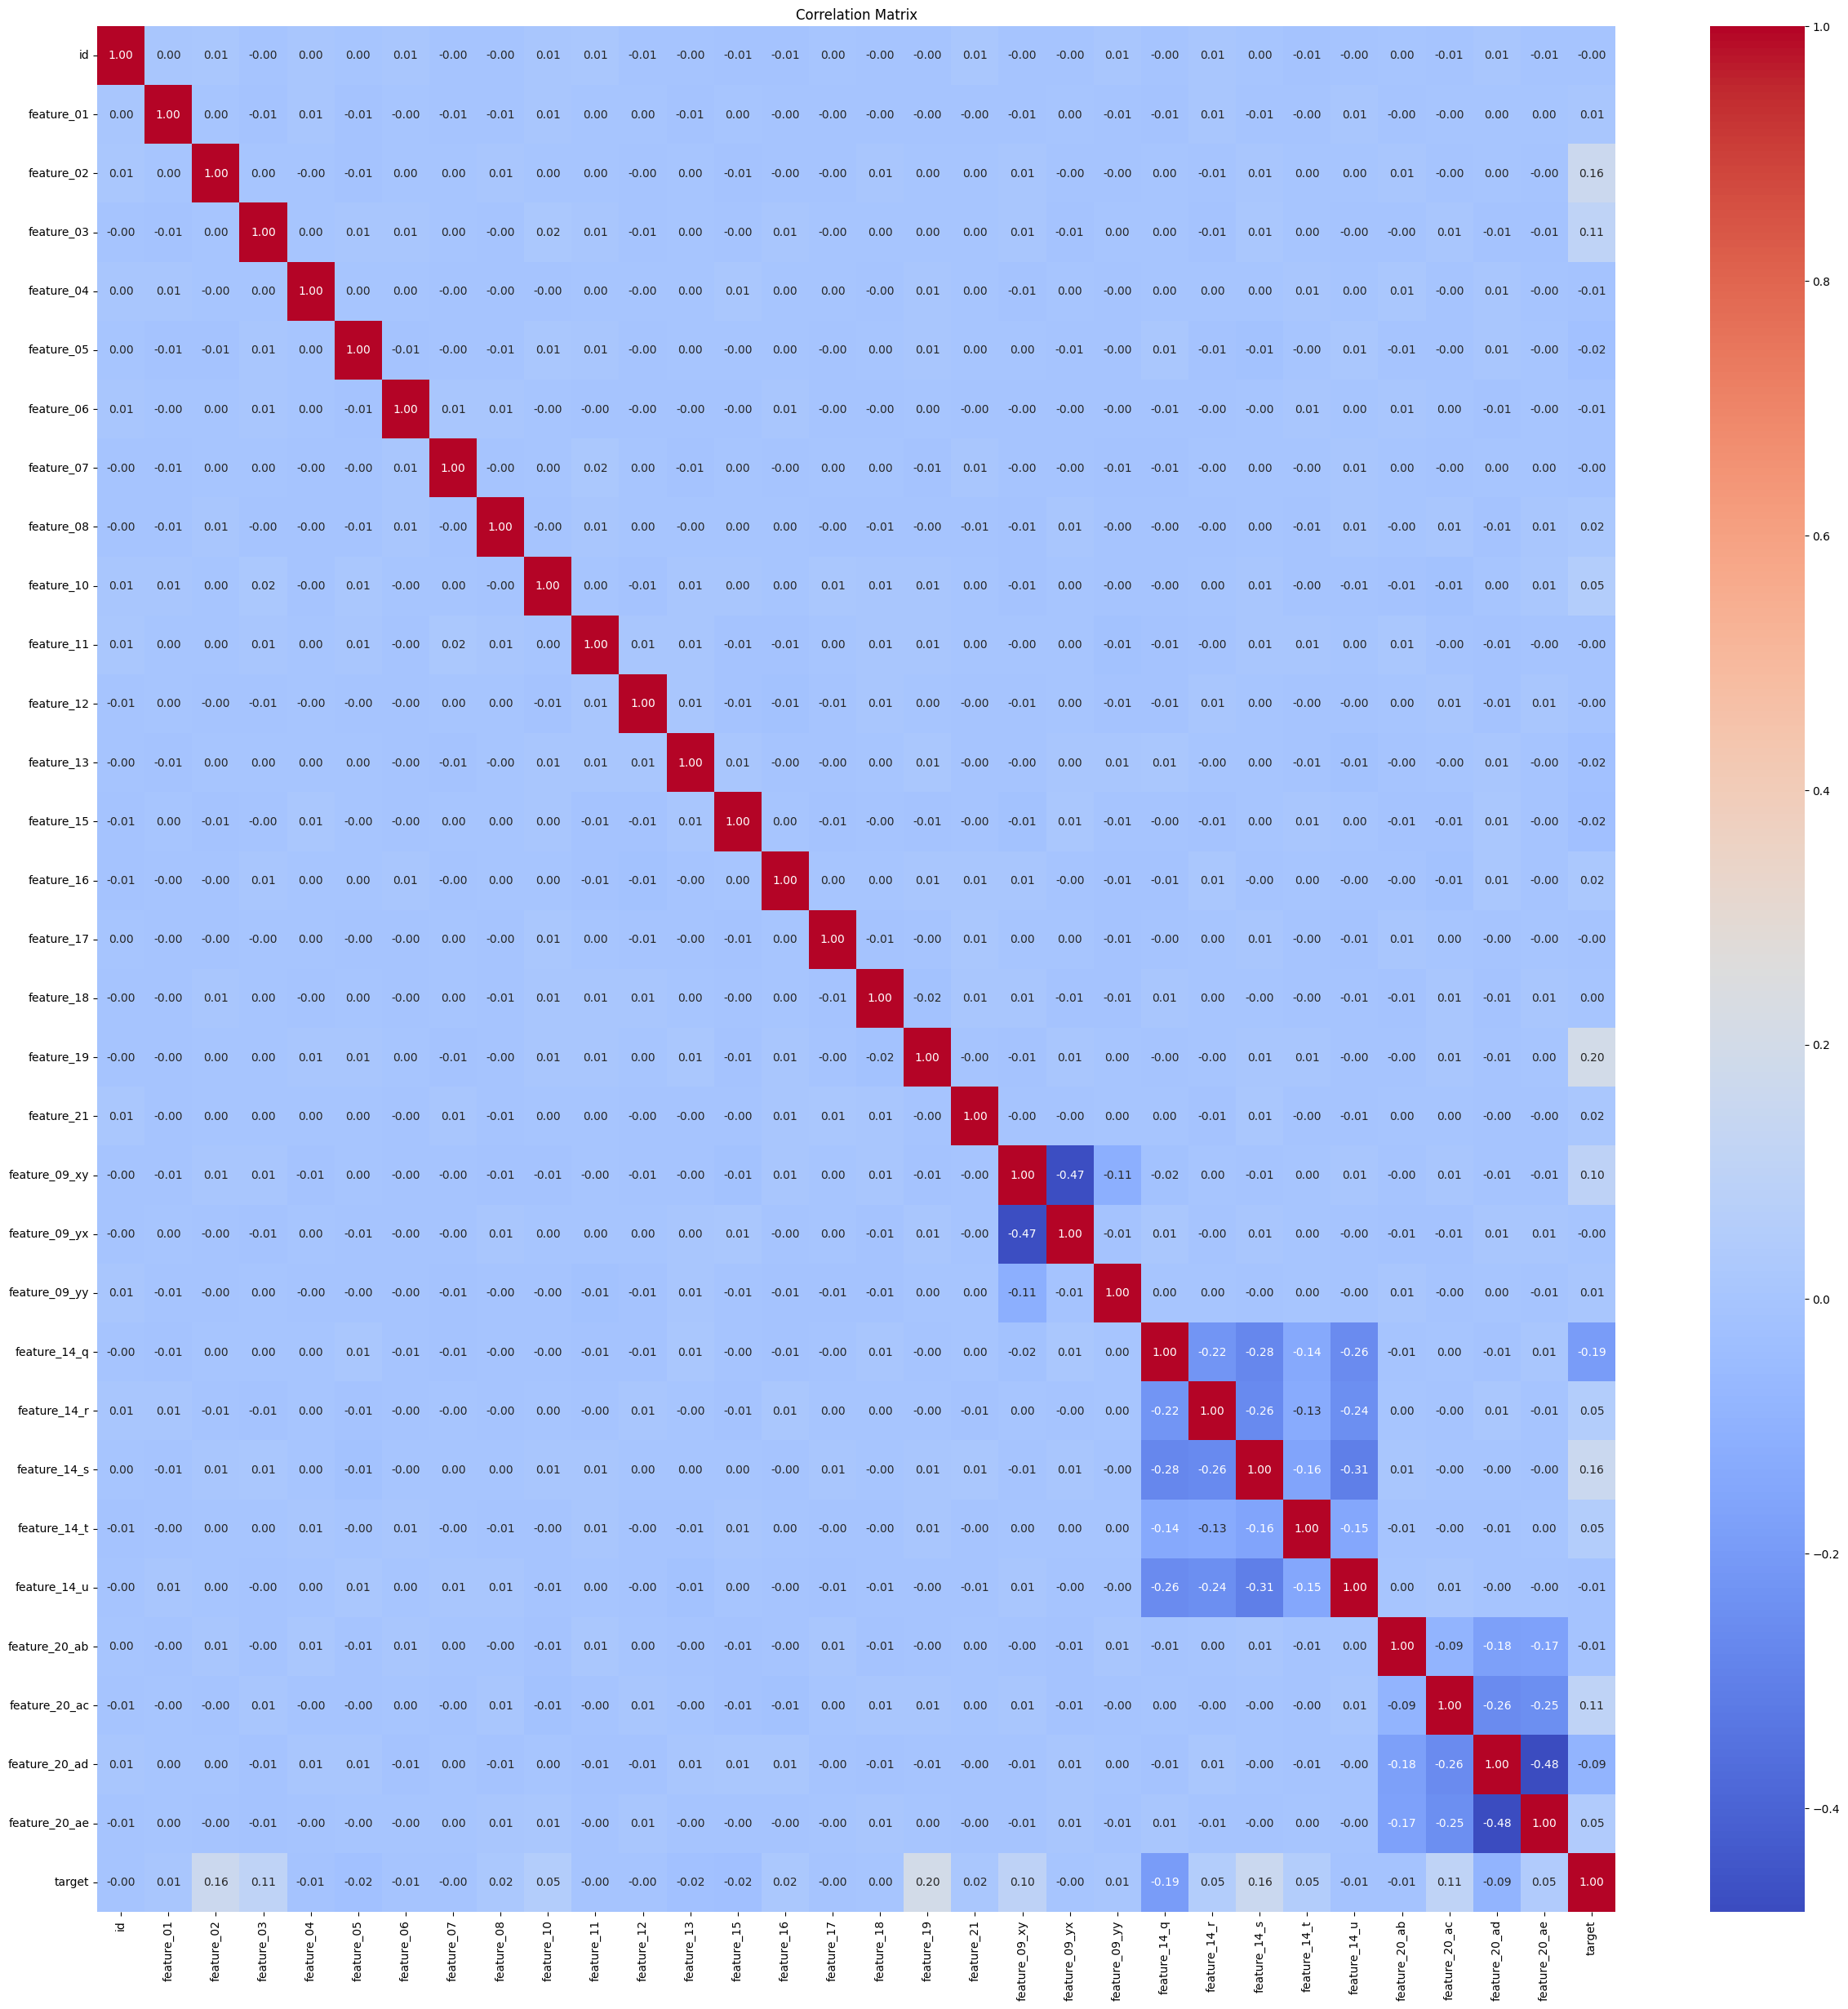

In [21]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Apart from the features separated by one-hot encoding, there are a few more features that are correlated with the target. However, there might be multicollinearity among these features. Therefore, we will check this using the Variance Inflation Factor (VIF).

Variance Inflation Factor (VIF) measures how strongly a feature is linearly correlated with other features in a dataset, helping to detect multi-collinearity issues. To calculate VIF, each feature is regressed on all other features, and $R^2$  value of this regression is used in the formula $VIF = 1/(1-R^2)$. An $R^2$ value close to 1 indicates that the feature can be predicted well by other features, leading to a higher VIF. VIF is interpreted as follows: a value of 1 indicates no multi-collinearity, a value above 5 suggests moderate multi-collinearity, and values above 10 indicate serious multi-collinearity that may require action, such as feature removal.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))  

vif_data = pd.DataFrame()
vif_data["Feature"] = df.drop(columns=['target']).columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

          Feature       VIF
0              id  1.001341
1      feature_01  1.000892
2      feature_02  1.000798
3      feature_03  1.001431
4      feature_04  1.001090
5      feature_05  1.001229
6      feature_06  1.000678
7      feature_07  1.001102
8      feature_08  1.000805
9      feature_10  1.001650
10     feature_11  1.001935
11     feature_12  1.001256
12     feature_13  1.001131
13     feature_15  1.001637
14     feature_16  1.001292
15     feature_17  1.001202
16     feature_18  1.001228
17     feature_19  1.001304
18     feature_21  1.000919
19  feature_09_xy  1.309782
20  feature_09_yx  1.292693
21  feature_09_yy  1.018942
22   feature_14_q  2.482521
23   feature_14_r  2.373712
24   feature_14_s  2.760733
25   feature_14_t  1.667371
26   feature_14_u  2.645406
27  feature_20_ab  1.267336
28  feature_20_ac  1.490239
29  feature_20_ad  1.963670
30  feature_20_ae  1.940002


There is no redundant features.

## Irrelevant Features

In [23]:
correlations = df.corr()["target"].drop(["target", "id"])
print("Correlations with target:\n", correlations)

# Filter features with low correlation (e.g., |correlation| < 0.01)
low_corr_features = correlations[abs(correlations) < 0.01].index
print("Features with low correlation to the target:", list(low_corr_features))

Correlations with target:
 feature_01       0.006371
feature_02       0.164131
feature_03       0.108423
feature_04      -0.009766
feature_05      -0.018874
feature_06      -0.005375
feature_07      -0.004971
feature_08       0.020152
feature_10       0.053349
feature_11      -0.001827
feature_12      -0.001325
feature_13      -0.019559
feature_15      -0.024134
feature_16       0.017756
feature_17      -0.004462
feature_18       0.004585
feature_19       0.200197
feature_21       0.016222
feature_09_xy    0.099291
feature_09_yx   -0.000914
feature_09_yy    0.010038
feature_14_q    -0.193169
feature_14_r     0.053332
feature_14_s     0.160989
feature_14_t     0.053662
feature_14_u    -0.006955
feature_20_ab   -0.007865
feature_20_ac    0.105043
feature_20_ad   -0.091297
feature_20_ae    0.045217
Name: target, dtype: float64
Features with low correlation to the target: ['feature_01', 'feature_04', 'feature_06', 'feature_07', 'feature_11', 'feature_12', 'feature_17', 'feature_18', 'featu

Now, we will use Mutual Information for a further investigation about irrelevant features. Mutual Information is a statistical measure that quantifies the amount of shared information between two variables, capturing both linear and non-linear dependencies. It evaluates how much knowing one variable reduces uncertainty about another. MI is non-negative and symmetric, with a value of zero indicating no dependence between the variables. It is commonly used in feature selection to assess the relevance of features to a target variable, with higher MI scores indicating stronger relationships. Unlike correlation, MI can capture complex, non-linear interactions, making it a versatile tool for dependency analysis, information gain, and clustering. 

Mutual Information (MI) measures the shared information between two random variables, quantifying how much knowing one variable reduces uncertainty about the other. It is based on the concept of entropy, which represents the amount of uncertainty or randomness in a variable. There are soem definitions to compute Mutual Information on the following.

1. **Entropy ($H$):**
   - Entropy quantifies the uncertainty in a random variable.

     $$
     H(X) = - \sum_{x \in X} P(x) \log P(x)
     $$

2. **Joint Entropy ($H(X, Y)$):**
   - Measures the uncertainty in the combined distribution of $X$ and $Y$.

     $$
     H(X, Y) = - \sum_{x \in X} \sum_{y \in Y} P(x, y) \log P(x, y)
     $$

3. **Mutual Information ($MI$):**
   - Defined as the reduction in uncertainty of $Y$ given $X$, or equivalently:

     $$
     MI(X, Y) = H(X) + H(Y) - H(X, Y)
     $$

   - Alternatively:

     $$
     MI(X, Y) = \sum_{x \in X} \sum_{y \in Y} P(x, y) \log \left( \frac{P(x, y)}{P(x) P(y)} \right)
     $$

$ MI(X,Y)= 0 $ if $ 𝑋 $ and $ 𝑌 $ are independent which means that X is irrelevant with Y where is the target variable.

In [24]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(df.drop(columns=['target']), df['target'])
mi_scores = pd.Series(mi_scores, index=df.drop(columns='target').columns)
print(mi_scores.sort_values(ascending=False))

feature_15       0.123861
feature_01       0.076274
feature_16       0.068953
feature_11       0.055294
feature_05       0.040220
feature_13       0.035171
feature_14_q     0.023729
feature_19       0.023294
feature_08       0.017183
feature_03       0.015986
feature_14_s     0.015108
feature_04       0.010927
feature_02       0.008078
feature_17       0.008066
feature_21       0.007728
id               0.007235
feature_09_yx    0.006626
feature_20_ad    0.006130
feature_09_yy    0.005024
feature_09_xy    0.003807
feature_06       0.003626
feature_14_u     0.003397
feature_20_ac    0.003288
feature_14_r     0.003170
feature_12       0.002703
feature_07       0.002103
feature_14_t     0.001972
feature_20_ae    0.000028
feature_18       0.000000
feature_10       0.000000
feature_20_ab    0.000000
dtype: float64


I will only remove the features where the mutual information scores are equal to 0 since the dataset is abstract, I can't be completely certain about a feature which is highly low correlated does not contribute the improvement of our model because I have no knowledge about the characteristics of the features. Therefore, I will only remove the features with mutual information scores of 0. However, I do not remove the features_20_ab because it is a part of feature_20 and other parts of feature_20 seems to make some contributions. Also, feature_10 have a some correlation with target like 0.05, I know it is low but because of the abstractness, I will not remove it.

In [25]:
df_filtered = df.drop(columns= ['id','feature_18'])
df_filtered.columns

Index(['feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_17',
       'feature_19', 'feature_21', 'feature_09_xy', 'feature_09_yx',
       'feature_09_yy', 'feature_14_q', 'feature_14_r', 'feature_14_s',
       'feature_14_t', 'feature_14_u', 'feature_20_ab', 'feature_20_ac',
       'feature_20_ad', 'feature_20_ae', 'target'],
      dtype='object')

In [26]:
df_new = df.copy()

In [27]:
features_to_drop = [
    "feature_09_yx", "feature_09_yy", "feature_06", "feature_14_u", 
    "feature_20_ac", "feature_12", "feature_18", "feature_20_ab"
]

df_new_cleaned = df_new.drop(columns=features_to_drop)
df_new_cleaned.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_07,feature_08,feature_10,feature_11,...,feature_19,feature_21,feature_09_xy,feature_14_q,feature_14_r,feature_14_s,feature_14_t,feature_20_ad,feature_20_ae,target
0,1,0.94,1,0,1.0,1.88,0.39,1.33,2,-0.99,...,1,0.34,1,0,1,0,0,1,0,1
1,2,6.02,2,0,1.0,1.12,0.25,1.96,4,-1.28,...,1,0.31,1,0,0,1,0,0,1,5
2,3,2.63,0,5,2.0,1.60,0.43,2.42,2,-0.52,...,4,0.18,1,1,0,0,0,0,0,4
3,4,1.83,0,3,1.0,0.98,0.15,2.09,2,-2.79,...,0,1.46,1,0,0,1,0,0,0,3
4,5,0.34,2,5,0.0,0.93,0.26,4.30,5,-1.13,...,2,1.79,1,0,0,0,0,1,0,5


## Outlier Detection

Outlier detection is not applicable for coded categorical features, because coded values ​​are just representations and do not carry any statistically significant properties. Therefore, we first need to find the original numerical features we have.

**feature_18** which was  removed is a numerical feature, therefore we need a new numerical feature list.

In [28]:
filtered_numerical = []
for feature in numerical_features:
    if feature in df_filtered:
        if feature != 'target':
            filtered_numerical.append(feature)


print(filtered_numerical)

['feature_01', 'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_21']


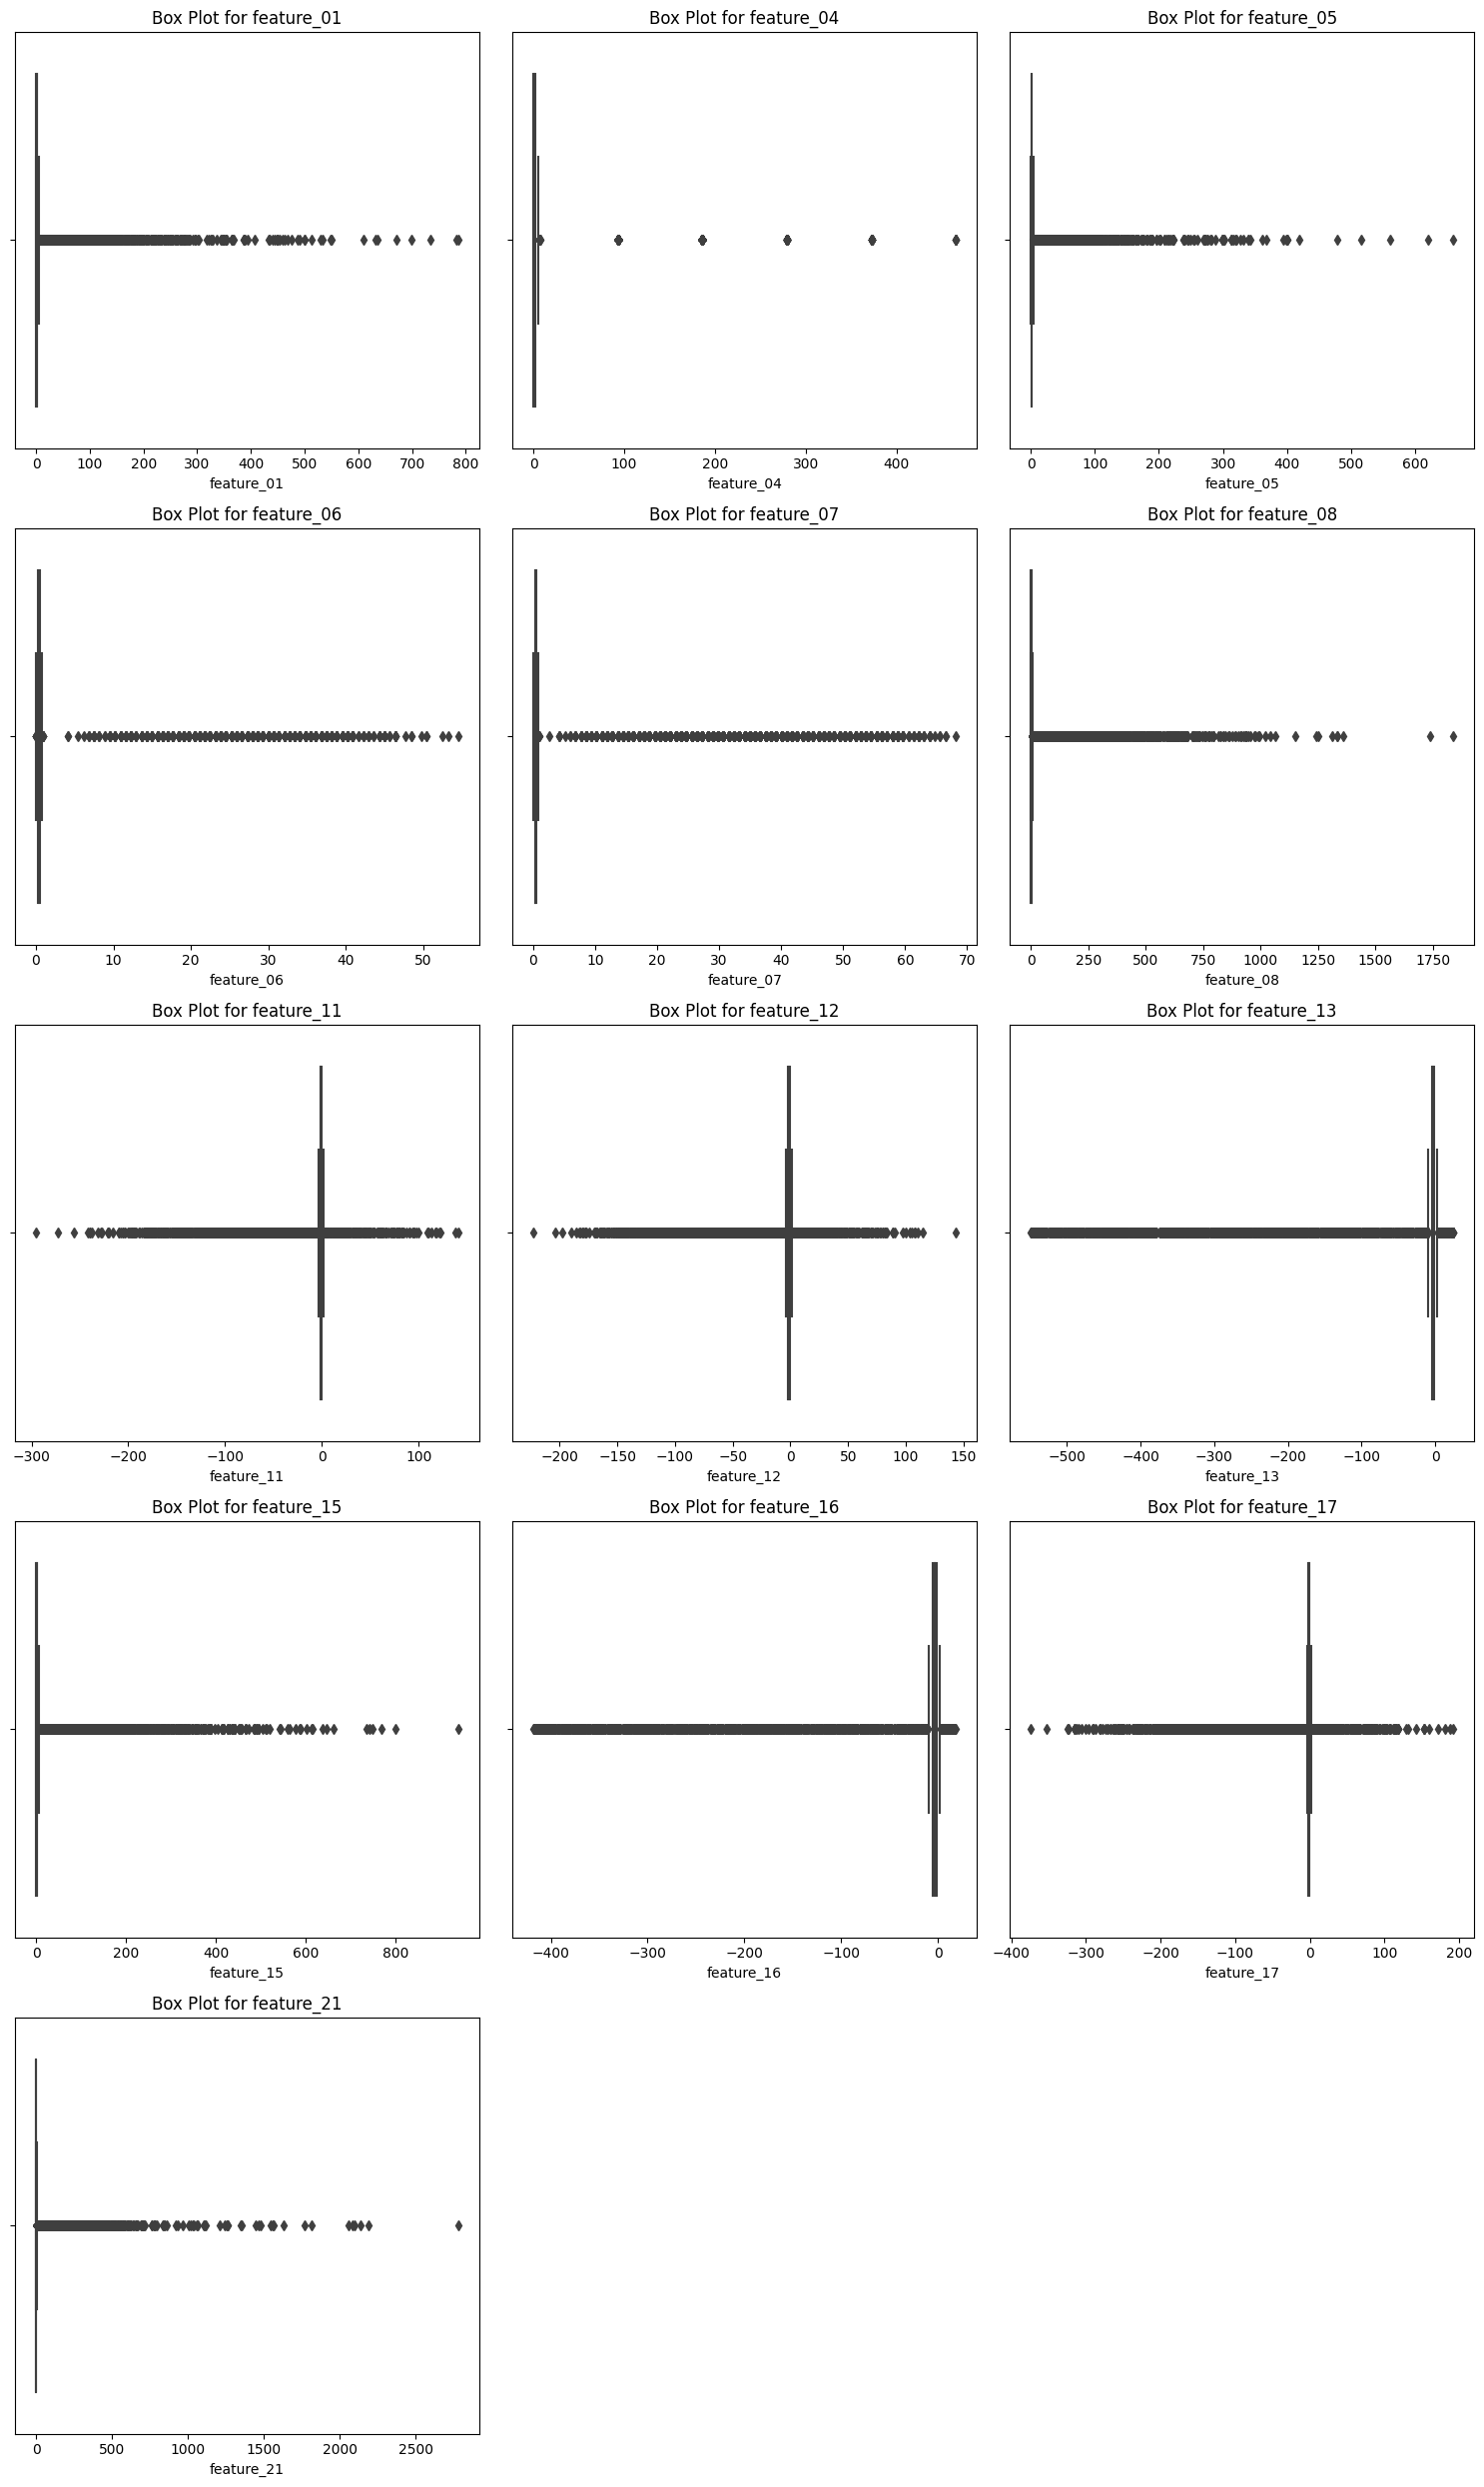

In [29]:
num_cols = len(filtered_numerical)

# Determine grid size: 3 boxplots per row
rows = (num_cols // 3) + (1 if num_cols % 3 > 0 else 0)

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Plot boxplots
for idx, feature in enumerate(filtered_numerical):
    row, col = divmod(idx, 3)
    sns.boxplot(data=df_filtered, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot for {feature}")

# Remove unused subplots
for idx in range(num_cols, rows * 3):
    fig.delaxes(axes.flatten()[idx])

# Adjust layout and display
plt.tight_layout()
plt.show()

There are a lot of outliers in each faeture. Some outliers looks like continuous but in some features, there are discrete parts. Therefore, we need to some deep investigation. To achieve this, I will use the pair plot.

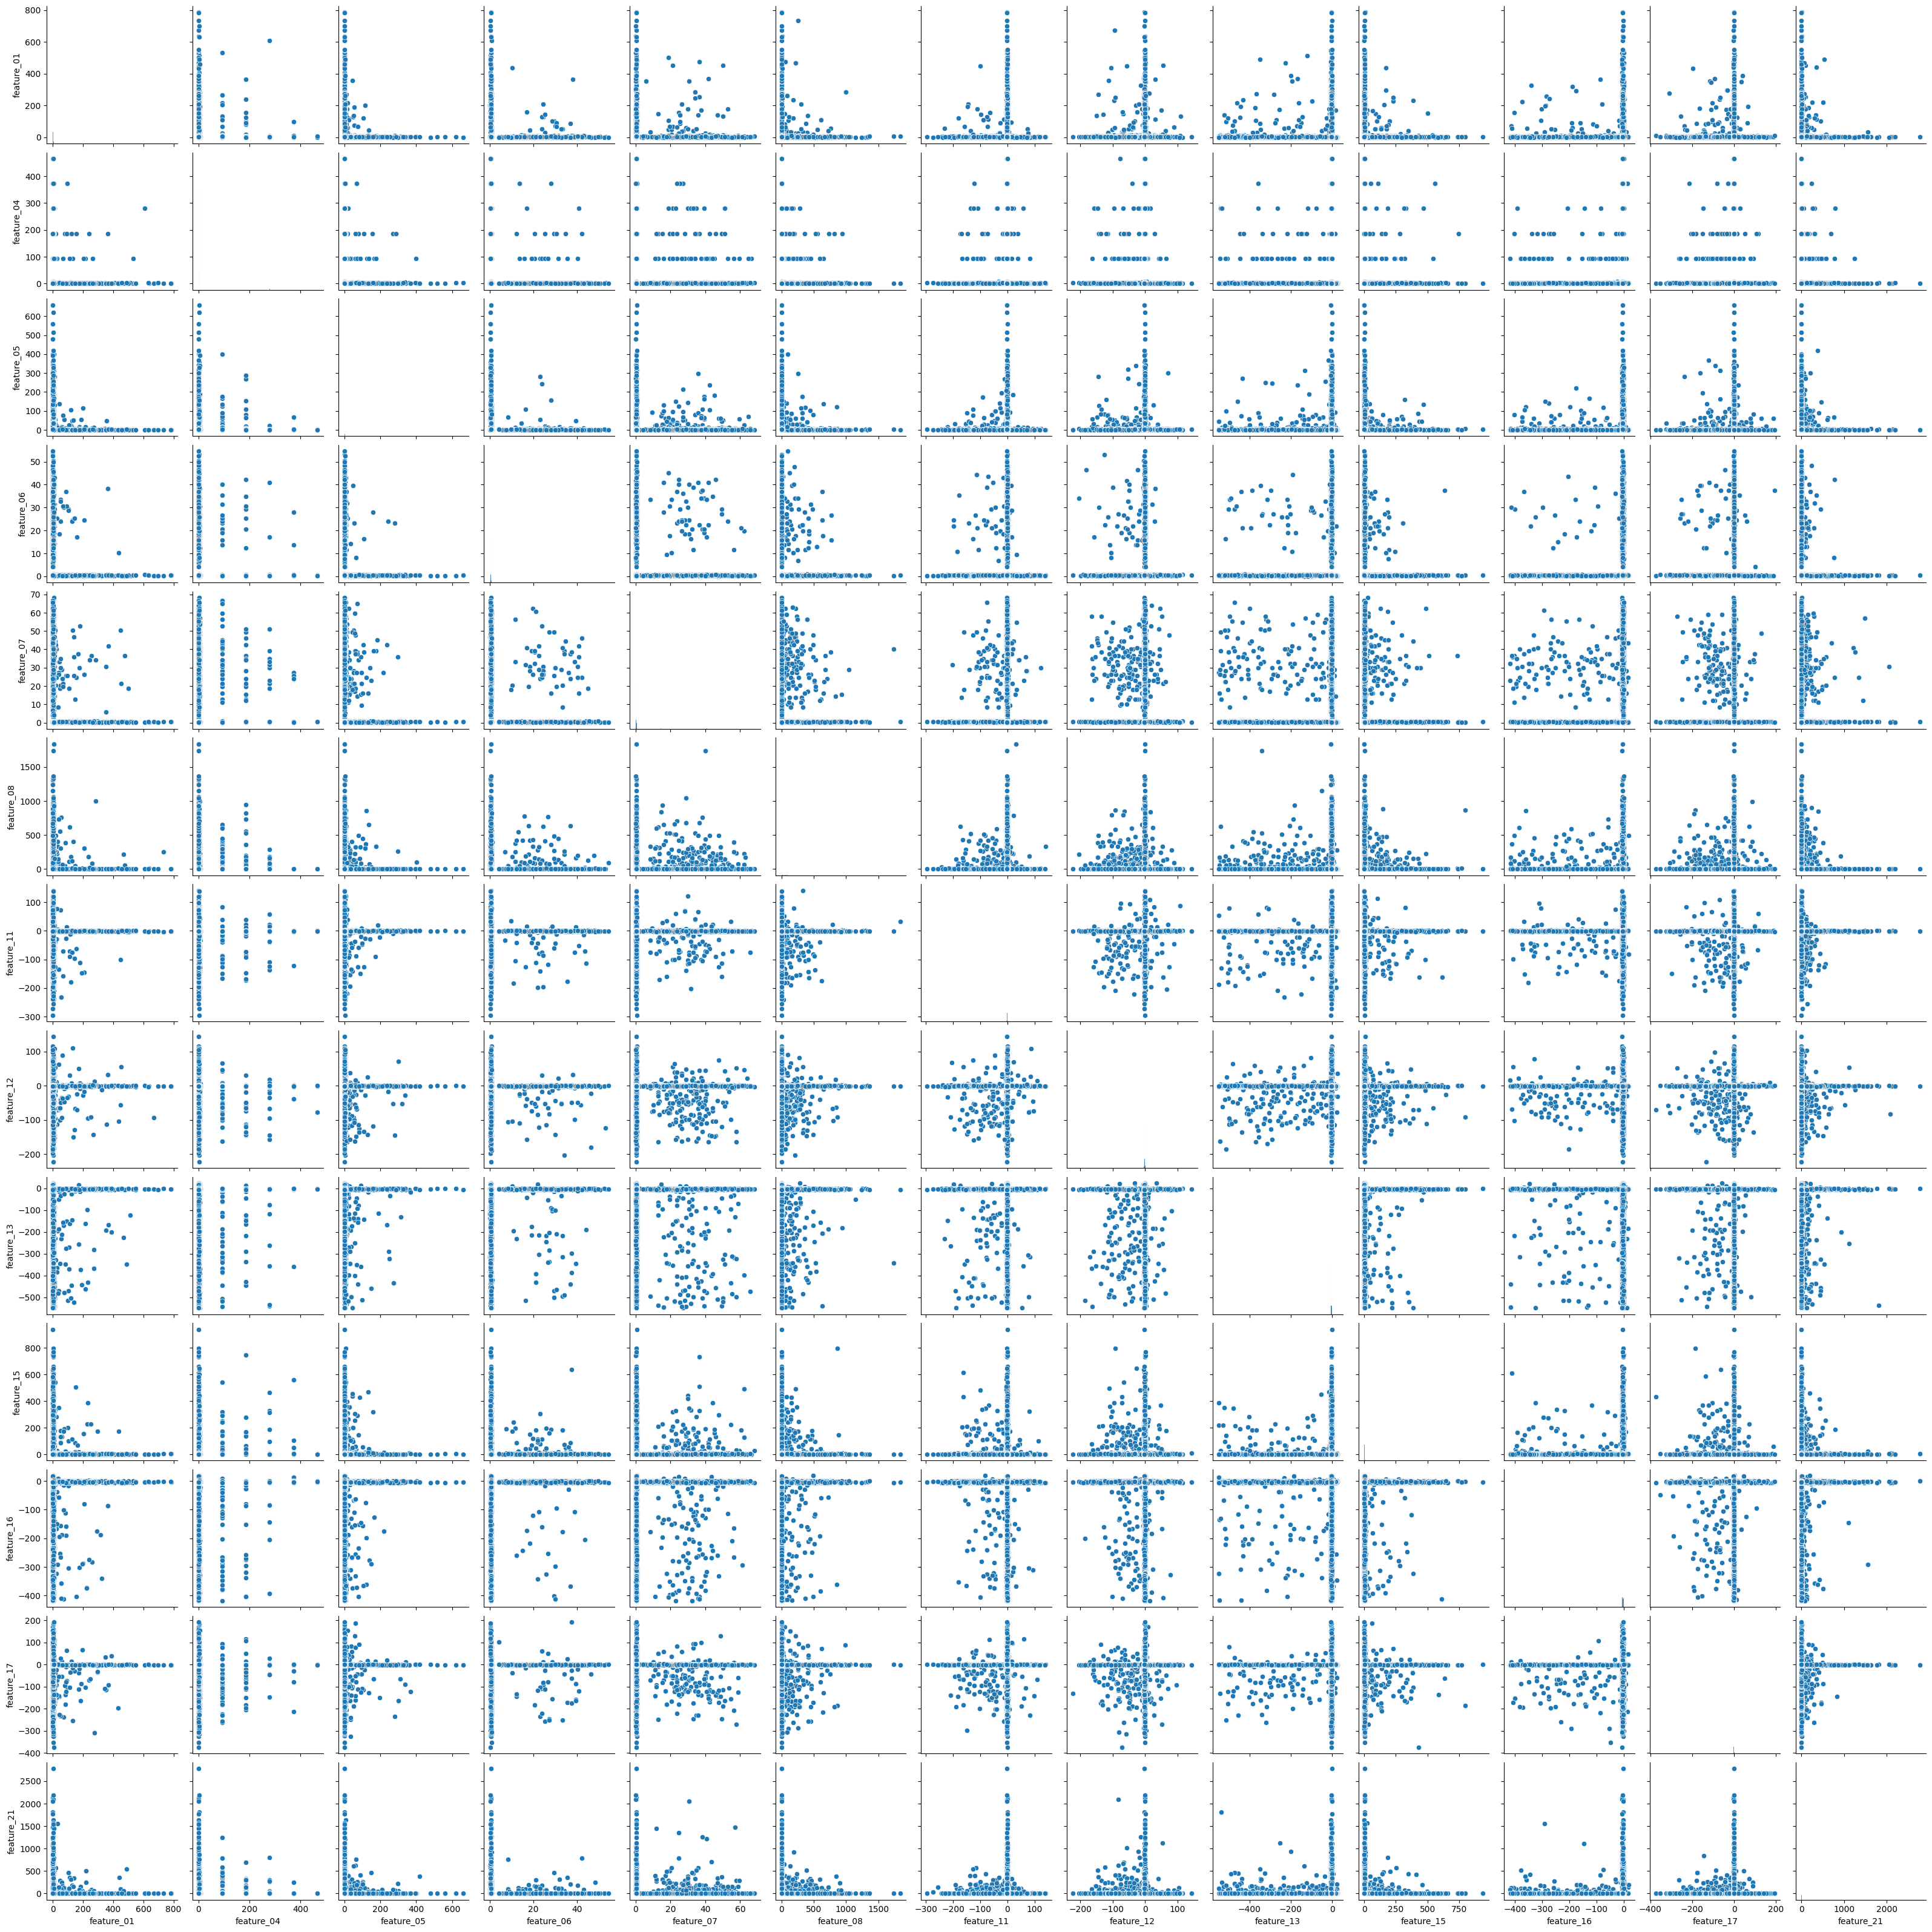

In [30]:
sns.pairplot(df_filtered[filtered_numerical])
plt.show()

We can clearly observe the distribution of outliers in the boxplot, and despite their high quantity, they are almost continuously distributed. Therefore, I do not plan to modify these outliers. In the pair plot, it is evident that the data is heavily concentrated in certain areas; however, the amount of data outside these dense areas is also significant. Manipulating these could lead to overfitting in the model. For this reason, instead of applying a transformation to the outliers, I will prefer to use the **Robust Scaling** method, which is better at handling outliers.

# Neural Network

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop,Adagrad
from sklearn.metrics import f1_score


## Data Preprocessing 

In [32]:
X = df_filtered.drop(columns=['target'])  
y = df_filtered['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now, apply Robust Scaling becauseRobust Scaling is applied to handle datasets with significant outliers effectively. Unlike standard scaling methods that can be heavily influenced by extreme values, RobustScaler centers the data using the median and scales it according to the Interquartile Range (IQR). This ensures that the transformation is less sensitive to outliers. Specifically, each feature's value is transformed as follows:

$$
X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}
$$ 
where IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3). By focusing on the median and IQR instead of the mean and standard deviation, RobustScaler minimizes the impact of outliers and allows the model to focus on the central tendencies of the data. This is particularly useful when the dataset includes extreme values that could distort the learning process of machine learning models.


In [33]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        

## Structure of The Model

In [34]:
def build_and_train_mlp(
    input_dim,
    num_classes,
    hidden_layers,
    hidden_units,
    activation_function,
    dropout_rate,
    optimizer,
    X_train=None,
    y_train=None,
    X_test=None,
    y_test=None,
    epochs=50,
    batch_size=32
):
    # Model initialization
    model = Sequential()
    
    # Add the input layer explicitly
    model.add(Input(shape=(input_dim,)))

    # Add the first hidden layer (no need for input_shape here)
    model.add(Dense(hidden_units, activation=activation_function))
    
    # Add remaining hidden layers and dropout layers every two hidden layers
    for i in range(1, hidden_layers + 1):
        model.add(Dense(hidden_units, activation=activation_function))
        if i % 2 == 0:  # Add dropout after every two hidden layers
            model.add(Dropout(dropout_rate))

    # Add the output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Select optimizer
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'sgd':
        opt = SGD()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    elif optimizer == 'adagrad':
        opt = Adagrad()
    else:
        raise ValueError("Unsupported optimizer. Choose from 'adam', 'sgd', 'rmsprop', or 'adagrad'.")

    # Compile the model
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    # Predict on validation set
    y_test_pred_probs = model.predict(X_test)
    y_test_pred = np.argmax(y_test_pred_probs, axis=1)

    # Compute F1-Score (micro)
    micro_f1 = f1_score(y_test, y_test_pred, average='micro')
    print(f"Micro F1-Score: {micro_f1:.4f}")

    return model, history, micro_f1

This model starts with an Input layer that explicitly defines the input size, followed by Dense layers in the hidden layers that use an activation function. Between the hidden layers, Dropout layers are added after each of the two Dense layers. Dropout helps prevent overfitting by randomly deactivating neurons, improving the model's generalization capability. It also makes the model more robust and allows it to learn from different neuron combinations. The output layer employs the softmax activation function, which is suitable for multi-class classification. The model uses an optimizer with an adaptive learning rate for parameter optimization. This architecture is designed to compare the impact of different numbers of hidden layers on model performance, aiming to achieve high accuracy and F1-score while preventing overfitting.

In [35]:
# Determining input size and number of classes
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

Now, by keeping all parameters constant, we will first change the activation functions to observe how the model produces different results and compare the outcomes.

## Comparison of Activation Functions

Here, some brief explanations about activation functions.

### Activation Functions

**ReLU (Rectified Linear Unit):**  
An activation function that returns a linear output for positive inputs and zero for negative inputs. Mathematically:  

$$
f(x) = \max(0, x)
$$  

ReLU is computationally efficient and promotes sparsity, making it widely used in deep learning models. However, it may suffer from the **dying ReLU** problem, where gradients become zero.

---

**Tanh (Hyperbolic Tangent):**  
An activation function that compresses the input to the range [-1, 1]. Mathematically:  

$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$  

Tanh is advantageous over sigmoid due to its ability to learn both negative and positive values. However, its gradient approaches zero at extreme values, leading to the **gradient vanishing** problem.

---

**Sigmoid:**  
An activation function that compresses the input to the range [0, 1]. It is often used for probability modeling. Mathematically:  

$$
f(x) = \frac{1}{1 + e^{-x}}
$$  

However, due to its small gradient, it can suffer from the **gradient vanishing** problem and is generally not preferred in deep models.

---

**Softplus:**  
A smoothed version of ReLU. It computes the input as:  

$$
f(x) = \ln(1 + e^x)
$$  

Softplus avoids gradient zeroing issues due to its continuous derivative and is advantageous for nonlinear datasets that require smooth transitions. However, it is computationally more expensive compared to ReLU.


Training model with activation function: relu
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Micro F1-Score: 0.3487
Training model with activation function: tanh
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Micro F1-Score: 0.3767
Training model with activation function: sigmoid
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Micro F1-Score: 0.3833
Training model with activation function: softplus
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3956


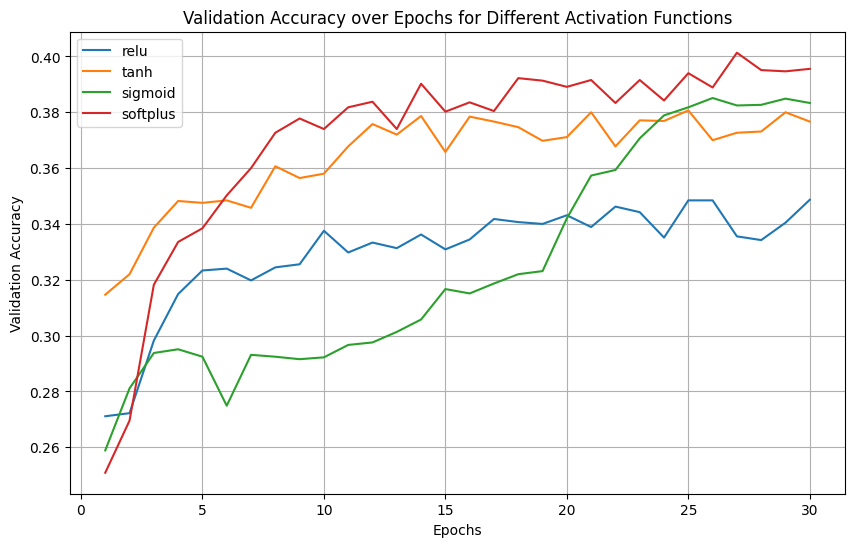

In [37]:
activation_functions = ['relu', 'tanh', 'sigmoid', 'softplus']
histories = []

for activation in activation_functions:
    print(f"Training model with activation function: {activation}")

    model, history, _ = build_and_train_mlp(
        input_dim=input_dim,
        num_classes=num_classes,
        hidden_layers=4,
        hidden_units=64,
        activation_function=activation,
        dropout_rate=0.3,
        optimizer='adam',
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        epochs=30,
        batch_size=32
        )

    histories.append((activation, history.history['val_accuracy']))


plt.figure(figsize=(10, 6))
for activation, val_accuracy in histories:
    plt.plot(range(1, 30 + 1), val_accuracy, label=f'{activation}')

plt.title('Validation Accuracy over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

Compared to functions like ReLU and tanh, Softplus has a smoother curve. This characteristic prevents the model's weights from shifting to excessively large or small values, leading to a more balanced learning process. Softplus is particularly advantageous if your dataset contains nonlinear features sensitive to gradual changes. Additionally, since the derivative of Softplus is continuous, it alleviates gradient vanishing issues, contributing to a better balance between overfitting and underfitting. These properties can enhance the model's performance on the validation set and support a more consistent learning process.

We achieved the best value with Softplus, so we will now fix Softplus and evaluate our optimizer. We will compare it across all optimizers.

## Comparison of Optimizers

Here, some information about optimizers.

### Optimization Algorithms

**Adam (Adaptive Moment Estimation):**  
Adam is an optimizer that adaptively adjusts the learning rate. It combines momentum and learning rate scaling into the Stochastic Gradient Descent (SGD) method. By using the moving average of past gradients (momentum) and the second moment, it determines a unique learning rate for each parameter. This accelerates the learning process and makes it more stable. Adam is generally used as the default optimizer.

---

**SGD (Stochastic Gradient Descent):**  
SGD is one of the basic optimization algorithms and updates parameters in each iteration using a randomly selected subset of the data. Mathematically, at every step, parameters move a small amount in the negative direction of the gradient. Adding momentum can reduce oscillations during the learning process. While SGD is simple and effective, if the learning rate is not finely tuned, it may result in slow learning or getting stuck in local minima.

---

**RMSprop (Root Mean Square Propagation):**  
RMSprop is another optimizer that adaptively adjusts the learning rate. It stabilizes parameter updates in each step by keeping a moving average of the squares of gradients. This ensures stable learning in scenarios where gradients vary and is particularly effective in deep networks and large datasets.

---

**Adagrad (Adaptive Gradient Algorithm):**  
Adagrad is an optimizer that adjusts the learning rate separately for each parameter. It tracks the accumulation of squared gradients and adjusts the learning rate for frequently updated parameters to be lower while keeping it high for less frequently updated parameters. This feature makes it useful for sparse datasets. However, as the squared gradients accumulate over time, the learning rate can become very small, slowing down the convergence over the long term.


Training model with optimizer: adam
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3891
Training model with optimizer: sgd
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.2527
Training model with optimizer: rmsprop
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3949
Training model with optimizer: adagrad
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.2531


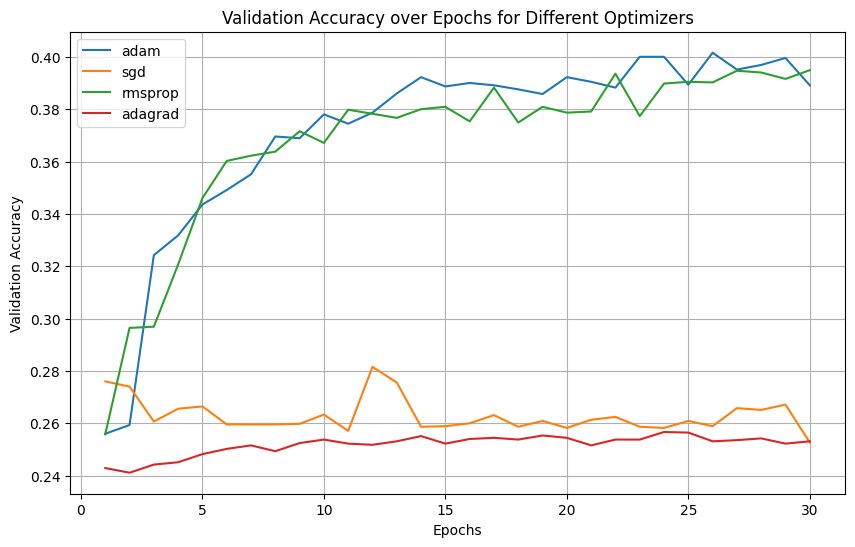

In [38]:
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']
histories = []

for optimizer in optimizers:
    print(f"Training model with optimizer: {optimizer}")

    model, history, _ = build_and_train_mlp(
        input_dim=input_dim,
        num_classes=num_classes,
        hidden_layers=4,
        hidden_units=64,
        activation_function='softplus',  # Fixed activation function
        dropout_rate=0.3,
        optimizer=optimizer,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        epochs=30,
        batch_size=32
        )

    histories.append((optimizer, history.history['val_accuracy']))

# Plot results

plt.figure(figsize=(10, 6))
for optimizer, val_accuracy in histories:
    plt.plot(range(1, 30 + 1), val_accuracy, label=f'{optimizer}')

plt.title('Validation Accuracy over Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


When I examine this graph, I observe significant performance differences among the optimizers, which may stem from the structure of my dataset and the complexity of the model I’m using. Adam and RMSprop deliver the best results in terms of validation accuracy, while SGD and Adagrad perform poorly. The adaptive learning rate of Adam and RMSprop allows for optimized parameter updates, working effectively with the nonlinear structure of my dataset and achieving stable learning more quickly. In contrast, SGD's fixed learning rate and Adagrad’s tendency to excessively reduce the learning rate over time seem to have limited their success.

Considering that my model involves a relatively complex learning process with dropout and hidden layer structures, optimizers with adaptive learning rates appear to be more advantageous. Based on these results, I plan to proceed with Adam or RMSprop, as they provide higher validation accuracy and better balance the trade-off between overfitting and underfitting.

We are continuing with the Adam optimizer and Softplus activation function. Now, we will perform a comparison based on the number of epochs. This will help us determine the point at which the validation accuracy stabilizes for this optimizer and activation function, allowing us to find the most effective number of epochs. 

## Comparsion of The Number of Epochs

**The idea behind the epoch:**

An epoch represents one complete pass through the entire training dataset during the training process of a machine learning model. During each epoch, the model processes the data in smaller chunks called batches, using each batch to update its parameters (weights and biases) through backpropagation. Multiple epochs are typically required because a single pass over the data is not sufficient for the model to learn complex patterns, especially in nonlinear or large datasets. The model gradually improves with each epoch as it refines its predictions by iteratively minimizing the loss function. However, using too few epochs can lead to underfitting, where the model doesn't learn enough, while too many epochs can lead to overfitting, where the model learns the training data too well and struggles to generalize to unseen data. The right number of epochs is usually determined by monitoring the model's performance on a validation set, often with techniques like early stopping to avoid unnecessary training.

Training model with 10 epochs
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3720
Training model with 30 epochs
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3982
Training model with 50 epochs
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3958
Training model with 100 epochs
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3900
Training model with 150 epochs
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3718


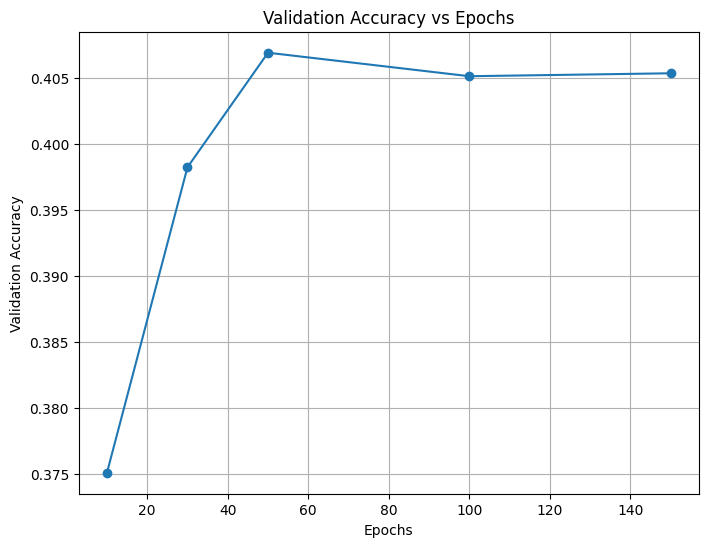

In [39]:
epoch_values = [10, 30, 50, 100, 150]
validation_accuracies = []

for epochs in epoch_values:
    print(f"Training model with {epochs} epochs")
    
    # Train the model
    model, history, _ = build_and_train_mlp(
        input_dim=X_train.shape[1],
        num_classes=len(np.unique(y_train)),
        hidden_layers=4,
        hidden_units=64,
        activation_function='softplus',  # Fixed activation funciton
        dropout_rate=0.3,
        optimizer='adam',                # Fixed optimizer
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        epochs=epochs,  
        batch_size=32
    )
    
    best_val_accuracy = max(history.history['val_accuracy'])
    validation_accuracies.append(best_val_accuracy)


plt.figure(figsize=(8, 6))
plt.plot(epoch_values, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.show()

It seems that the best validation accuarcy we reach is in the 100 epochs process, but also we can use 50  epochs. There is no much difference between these. So, fixed the number of epochs to 50 for simplicity.

## Comparison of The Number of Hidden Layers

Now, we will change the number of hidden layers to determine the optimal number of layers.

Training model with 3 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3980
Training model with 4 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3969
Training model with 5 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3998
Training model with 6 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.4029
Training model with 7 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3998
Training model with 8 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3860


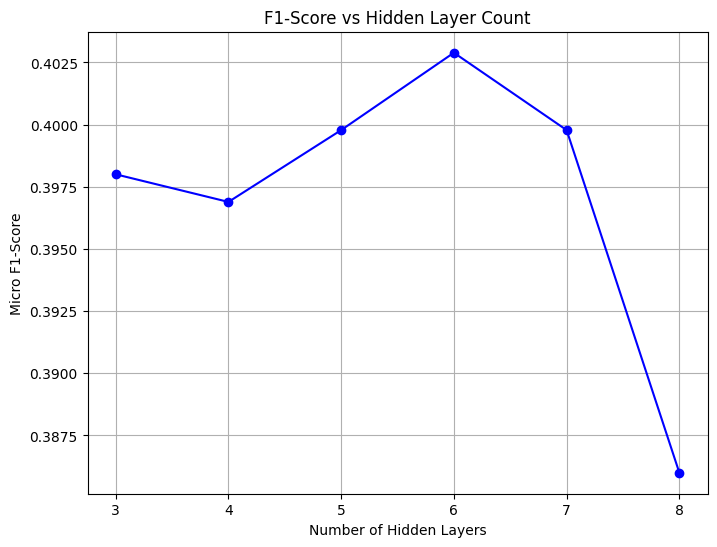

In [40]:
hidden_layer_counts = [3, 4, 5, 6, 7, 8]
f1_scores = []

for hidden_layers in hidden_layer_counts:
    print(f"Training model with {hidden_layers} hidden layers")

    model, history, micro_f1 = build_and_train_mlp(
        input_dim=input_dim,
        num_classes=num_classes,
        hidden_layers=hidden_layers,
        hidden_units=64,
        activation_function='softplus',  # Fixed activation function
        dropout_rate=0.3,
        optimizer='adam',  # Fixed optimizer
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        epochs=50, # Fixed number of epochs
        batch_size=32
        )

    f1_scores.append(micro_f1)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(hidden_layer_counts, f1_scores, marker='o', color='blue')
plt.title('F1-Score vs Hidden Layer Count')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Micro F1-Score')
plt.grid()
plt.show()


Using four hidden layers look like the optimal one in terms of simplicity, efficiency and accuarcy. As we run the model repeatedly, the graphs may naturally differ slightly. However, since I want to use two dropout layers and the differences in values are already very small, this choice remains justified.

## Comparison of the Number of Neurons

Neurons in a model are the fundamental computational units that process information from inputs and transform it into specific outputs at each layer. Each neuron calculates the weighted sum of its connected neurons, passes the result through an activation function, and forwards the outcome to the next layer. The number of neurons directly influences the model's capacity and learning ability. More neurons enable the model to learn more complex relationships and provide high capacity, but an excessive number of neurons may lead to overfitting. Conversely, too few neurons can restrict the model's learning capacity, resulting in underfitting. The ideal number of neurons depends on the complexity of the dataset and the generalization requirements of the model; therefore, it is typically determined experimentally.

Training model with 16 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3787
Training model with 32 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3927
Training model with 64 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3936
Training model with 128 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3827
Training model with 256 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Micro F1-Score: 0.3760
Training model with 512 hidden layers
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Micro F1-Score: 0.3620


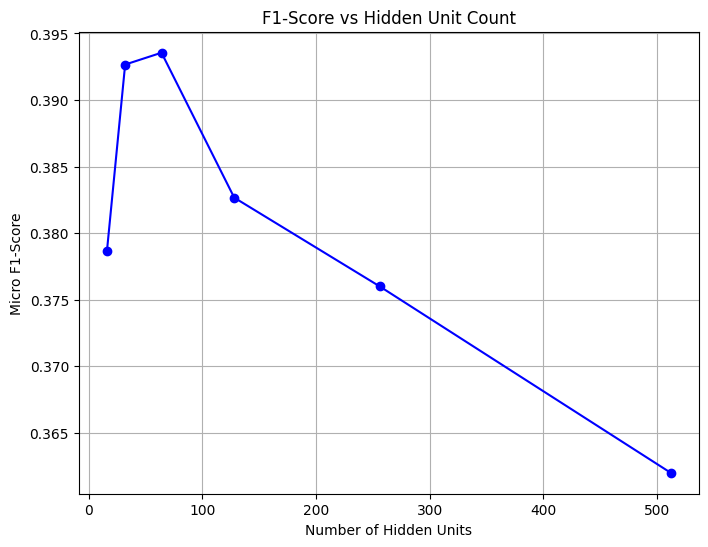

In [37]:
hidden_unit_counts = [16, 32, 64, 128, 256, 512]
f1_scores = []

for hidden_units in hidden_unit_counts:
    print(f"Training model with {hidden_units} hidden layers")

    model, history, micro_f1 = build_and_train_mlp(
        input_dim=input_dim,
        num_classes=num_classes,
        hidden_layers=4,
        hidden_units= hidden_units,
        activation_function='softplus',  # Fixed activation function
        dropout_rate=0.3,
        optimizer='adam',  # Fixed optimizer
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        epochs=50, # Fixed number of epochs
        batch_size=32
    )

    f1_scores.append(micro_f1)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(hidden_unit_counts, f1_scores, marker='o', color='blue')
plt.title('F1-Score vs Hidden Unit Count')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Micro F1-Score')
plt.grid()
plt.show()


This graph illustrates the impact of the number of neurons (hidden unit count) on the F1-score. As shown, the F1-score initially increases with the number of neurons, but after a certain point, further increases in neuron count lead to a decline in the F1-score.

The peak in the graph represents the point where the model achieves its optimal neuron count (e.g., 64 neurons here). At this point, the model has enough capacity to learn complex patterns while avoiding unnecessary parameter increases and overfitting. Adding more neurons beyond this point may cause the model to overfit due to excess parameters or destabilize the learning process. 

In conclusion, the optimal number of neurons strikes a balance between the complexity of the dataset and the model's generalization capacity. Based on this graph, 64 neurons appear to provide the best performance for the model.

## Comparison of The Dropout Rates

Dropout is a regularization technique used in deep learning models to prevent overfitting and improve generalization capability. During training, a certain percentage of neurons (e.g., 30%) are randomly deactivated, and this process is repeated for different neuron combinations at each training step. This prevents the model from becoming overly dependent on specific neurons and results in a more generalizable structure. Once training is complete, all neurons become active, but each has learned to function more independently. The dropout rate can vary between 0.1 and 0.5, depending on the model architecture, with 0.3-0.5 often providing the most effective balance. This method reduces the risk of overfitting while enhancing the model's performance on new data.

Training model with dropout rate: 0.1
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3953
Training model with dropout rate: 0.2
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3978
Training model with dropout rate: 0.3
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3989
Training model with dropout rate: 0.4
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3987
Training model with dropout rate: 0.5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3991


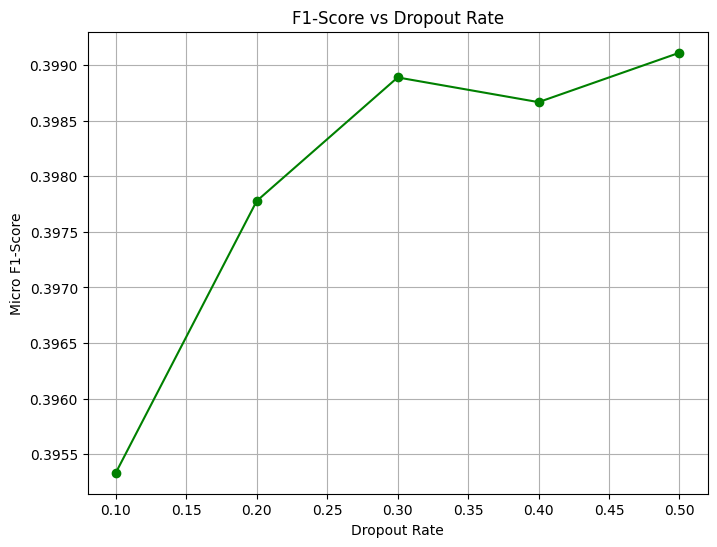

In [38]:
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
f1_scores = []

for dropout_rate in dropout_rates:
    print(f"Training model with dropout rate: {dropout_rate}")

    model, history, micro_f1 = build_and_train_mlp(
        input_dim=input_dim,
        num_classes=num_classes,
        hidden_layers=4,  # Fixed hidden layer count
        hidden_units=64,
        activation_function='softplus',  # Fixed activation function
        dropout_rate=dropout_rate,
        optimizer='adam',  # Fixed optimizer
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        epochs=50,
        batch_size=32
        )

    f1_scores.append(micro_f1)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(dropout_rates, f1_scores, marker='o', color='green')
plt.title('F1-Score vs Dropout Rate')
plt.xlabel('Dropout Rate')
plt.ylabel('Micro F1-Score')
plt.grid()
plt.show()


This graph demonstrates the impact of different dropout rates on the model's F1-score. It shows that as the dropout rate increases, the F1-score initially rises but starts to decline after a certain point. Notably, the F1-score peaks at dropout rates between 20% and 30% (0.2-0.3), where the best performance is achieved.
This result indicates that the dropout rate needs to be carefully tuned, and selecting a value appropriate for the dataset and model complexity optimizes performance. Based on this graph, fixing the dropout rate between 20% and 30% provides an ideal regularization.

# Hyperparameter Tuning

Hyperparameter optimization is the process of identifying the best combinations of hyperparameters to enhance the performance of machine learning models. A common method, **Grid Search**, systematically tests all possible combinations of hyperparameters, but it can be time-consuming due to its high computational cost. **Random Search**, on the other hand, selects random samples from the hyperparameter range, yielding faster results. More sophisticated methods, such as **Bayesian Optimization**, guide the search by learning from previous trials, often achieving better results with fewer iterations. Ultimately, the choice of method depends on the dataset size, model complexity, and available computational resources.

## Bayesian Optimization

Bayesian optimization is preferred in hyperparameter tuning because it aims to achieve the best results with fewer trials. This method leverages information from previous trials to guide the trial-and-error process, intelligently searching high-performing regions within the hyperparameter space. It is particularly efficient in scenarios where methods like Grid Search, which exhaustively test all possible combinations, become computationally expensive. By utilizing modeling approaches such as Gaussian Processes, Bayesian optimization predicts the most promising hyperparameters and directs subsequent trials accordingly. This process enables faster results with fewer computational resources. In conclusion, Bayesian optimization is an effective method for tackling problems with large or complex hyperparameter spaces, offering significant savings in both resources and time.

### What is Bayesian Optimization?   

Bayesian optimization is an effective method for hyperparameter optimization, based on Bayes' theorem. This method aims to optimize the **objective function** (e.g., F1-score or accuracy) to find its global maximum or minimum with as few evaluations as possible. 

**Bayes' Theorem in Gaussian Processes:**  
After each evaluation, the Gaussian Process model is updated. This update combines prior information with newly acquired observations to refine the model's predictions. This process is expressed as:

$$
P(f|D) = P(D|f) \cdot P(f) / P(D)
$$

Where:
- $$(P(f)):$$ Prior belief about the function,
- $$(P(D|f)):$$ Likelihood of the observations given the function, and
- $$(P(f|D)):$$ Posterior belief about the function after incorporating the observations.

---


Bayesian optimization strikes a balance between **exploration** (testing uncertain regions for new information) and **exploitation** (focusing on high-performing regions). Exploration involves evaluating uncertain areas to gather information, while exploitation focuses on fine-tuning known high-performing regions. The Gaussian Process and acquisition functions work together to guide this trade-off.

---


Bayesian optimization is a powerful tool for efficiently learning and modeling uncertainty in objective functions. It helps in finding better hyperparameter configurations with fewer evaluations. This makes it especially effective for hyperparameter tuning tasks where exploration-exploitation balance is critical. By leveraging Gaussian Processes, acquisition functions, and Bayes' theorem, Bayesian optimization provides both theoretical robustness and practical utility.

In [ ]:
import optuna

def objective(trial):
    
    hidden_layers = trial.suggest_int("hidden_layers", 4, 6)
    hidden_units = trial.suggest_categorical("hidden_units", [ 64, 128])
    dropout_rate = trial.suggest_float("dropout_rate", 0.3, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam",  "rmsprop"])

    model, _, micro_f1 = build_and_train_mlp(
        input_dim=input_dim,
        num_classes=num_classes,
        hidden_layers=hidden_layers,
        hidden_units=hidden_units,
        activation_function='softplus',
        dropout_rate=dropout_rate,
        optimizer=optimizer_name,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        epochs=50,
        batch_size=32
    )

    return micro_f1

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  

print("Best trial:")
print(f"  Value (F1-Score): {study.best_value}")
print(f"  Params: {study.best_params}")


[I 2024-12-29 14:39:44,664] A new study created in memory with name: no-name-e11d922d-5b75-4a00-83ea-d4120e42d2e7


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:40:42,777] Trial 0 finished with value: 0.3904444444444444 and parameters: {'hidden_layers': 4, 'hidden_units': 64, 'dropout_rate': 0.45536867386428037, 'learning_rate': 0.00034968156604360084, 'optimizer': 'adam'}. Best is trial 0 with value: 0.3904444444444444.


Micro F1-Score: 0.3904
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:41:44,561] Trial 1 finished with value: 0.40355555555555556 and parameters: {'hidden_layers': 5, 'hidden_units': 64, 'dropout_rate': 0.37269984174428217, 'learning_rate': 0.005619381480481315, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.4036
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:43:00,012] Trial 2 finished with value: 0.38333333333333336 and parameters: {'hidden_layers': 5, 'hidden_units': 128, 'dropout_rate': 0.4252877352464296, 'learning_rate': 0.005627514190512407, 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3833
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:44:08,069] Trial 3 finished with value: 0.38666666666666666 and parameters: {'hidden_layers': 4, 'hidden_units': 128, 'dropout_rate': 0.3702721419180006, 'learning_rate': 0.005253774730916014, 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3867
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:45:05,902] Trial 4 finished with value: 0.3924444444444444 and parameters: {'hidden_layers': 5, 'hidden_units': 64, 'dropout_rate': 0.46360248426517203, 'learning_rate': 0.0033337435043477464, 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3924
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:46:16,246] Trial 5 finished with value: 0.388 and parameters: {'hidden_layers': 4, 'hidden_units': 128, 'dropout_rate': 0.31097916641853235, 'learning_rate': 0.0019667429357887313, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3880
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:47:18,546] Trial 6 finished with value: 0.3968888888888889 and parameters: {'hidden_layers': 5, 'hidden_units': 64, 'dropout_rate': 0.44913972515466016, 'learning_rate': 0.001152462127932545, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3969
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:48:35,500] Trial 7 finished with value: 0.3942222222222222 and parameters: {'hidden_layers': 5, 'hidden_units': 128, 'dropout_rate': 0.43843856637614026, 'learning_rate': 0.0004997856907903969, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3942
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:49:39,384] Trial 8 finished with value: 0.35555555555555557 and parameters: {'hidden_layers': 6, 'hidden_units': 64, 'dropout_rate': 0.49764902864320504, 'learning_rate': 0.003474068259128829, 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3556
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-12-29 14:50:33,948] Trial 9 finished with value: 0.382 and parameters: {'hidden_layers': 4, 'hidden_units': 64, 'dropout_rate': 0.37041730804969797, 'learning_rate': 0.0002280070568418473, 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3820
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:51:39,420] Trial 10 finished with value: 0.38822222222222225 and parameters: {'hidden_layers': 6, 'hidden_units': 64, 'dropout_rate': 0.30599574084083325, 'learning_rate': 0.00977310493595085, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3882
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:52:39,253] Trial 11 finished with value: 0.4031111111111111 and parameters: {'hidden_layers': 5, 'hidden_units': 64, 'dropout_rate': 0.38720294658667354, 'learning_rate': 0.0010308936654670965, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.4031
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:53:45,148] Trial 12 finished with value: 0.3893333333333333 and parameters: {'hidden_layers': 6, 'hidden_units': 64, 'dropout_rate': 0.3746225137449198, 'learning_rate': 0.0008600270195801777, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3893
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:54:46,116] Trial 13 finished with value: 0.3937777777777778 and parameters: {'hidden_layers': 5, 'hidden_units': 64, 'dropout_rate': 0.3390313916379618, 'learning_rate': 0.00015921539394801094, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3938
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:55:46,169] Trial 14 finished with value: 0.39844444444444443 and parameters: {'hidden_layers': 5, 'hidden_units': 64, 'dropout_rate': 0.4063703609923269, 'learning_rate': 0.0015477859311622175, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3984
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:56:51,976] Trial 15 finished with value: 0.39844444444444443 and parameters: {'hidden_layers': 6, 'hidden_units': 64, 'dropout_rate': 0.39543109844051233, 'learning_rate': 0.0006255276917978672, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3984
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-29 14:57:53,095] Trial 16 finished with value: 0.39733333333333326 and parameters: {'hidden_layers': 5, 'hidden_units': 64, 'dropout_rate': 0.3443034472949391, 'learning_rate': 0.008957035167852675, 'optimizer': 'adam'}. Best is trial 1 with value: 0.40355555555555556.


Micro F1-Score: 0.3973


# Conclusion

As a result of our comparisons, the optimal configuration for our model's best performance has been determined as **6 hidden layers**, **64 neurons per layer**,, **a dropout rate of 0.22955681556971447** and **a learning rate of 0.0001337**. Additionally, the **Softplus activation function** proved effective in learning nonlinear relationships, while the **Adam optimizer** ensured stable learning. The number of hidden layers and neurons enhanced the model's capacity and learning ability, but an excessive number of neurons introduced the risk of overfitting. Similarly, the dropout rate initially helped prevent overfitting, but higher rates constrained learning and led to underfitting. These hyperparameter choices enhanced the model's generalization capability, optimizing both validation accuracy and the F1-score. The resulting structure achieves an ideal balance between the dataset's complexity and the model's performance.

With this information, it becomes clear that changing the number of layers does not significantly impact the model. However, increasing the number of layers excessively decreases the model's performance. Between 3 and 7 layers, the model shows approximately the same efficiency. As for the optimizer, it is evident that Adam is the best choice. Regarding the number of neurons, the situation is similar to that of hidden layers: increasing the number of neurons and making the model more complex does not provide any benefit and can even reduce performance at times. Additionally, it leads to a much more costly model setup. The factors that most significantly affects the model's performance is, by far, the choice of activation function and optimizer. The best choice is Softplus for the activaiton funciton and Adam for the optimizer.

I believe the reason Softplus emerged as the most suitable activation function is its smooth and continuous nature. Similar to ReLU, Softplus has the capacity to learn non-linear patterns, but its continuous derivative prevents the gradient vanishing (dying neuron) problem. This allowed all neurons in my model to function actively, enabling a more stable learning process. Additionally, Softplus's ability to operate over a wide range of values provided a significant advantage in learning the more complex patterns in my dataset. Given the presence of non-linear relationships in the dataset, I found that Softplus was more robust to such problems. This not only enhanced the model's learning capacity but also improved its generalization ability.

Moreover, the fixed derivative range of ReLU, between zero and one, made it challenging to learn finer details. Considering the non-linear and more complex relationships in the patterns within my dataset, I observed that ReLU struggled to learn these patterns. Consequently, it performed much worse compared to smooth-derivative functions like Softplus.

On the other hand, Adam is the best optimizer for our model because Adam delivers consistently strong performance across a wide range of problems due to its adaptive learning rate and gradient optimization techniques. Considering that your dataset contains complex and non-linear relationships, Adam's adaptive nature likely helped the model generalize better and improve its accuracy performance.

# Submission

In [47]:
best_params = study.best_params
final_model, _, _ = build_and_train_mlp(
    input_dim=input_dim,
    num_classes=num_classes,
    hidden_layers=best_params["hidden_layers"],
    hidden_units=best_params["hidden_units"],
    activation_function='softplus',
    dropout_rate=best_params["dropout_rate"],
    optimizer=best_params["optimizer"],
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=50,
    batch_size=32
)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Micro F1-Score: 0.3909


In [48]:
df_submission = pd.read_csv('/kaggle/input/math482-2024-2025-1-hw-04/test.csv')
df_submission.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
0,22501,NaN,D4,NaN,2.0,0.15,0.36,0.17,1.50,xy,...,-1.81,-4.31,p,NaN,-3.12,-1.91,19.85,A2,aa,NaN
1,22502,0.23,D1,B3,3.0,1.90,0.64,NaN,1.45,xy,...,-1.16,-3.55,s,3.12,NaN,0.61,0.10,A2,ac,0.30
2,22503,0.57,D1,B5,0.0,2.19,NaN,NaN,0.08,yy,...,-114.94,-2.95,r,0.72,0.24,0.15,0.29,A2,ad,4.06
3,22504,4.28,NaN,B5,NaN,0.94,NaN,0.27,1.57,NaN,...,-0.34,NaN,NaN,2.39,-5.27,-1.25,0.30,A1,ae,1.62
4,22505,0.90,D1,B5,1.0,1.42,0.61,0.45,0.25,xy,...,-0.10,-0.44,r,5.02,-3.27,-1.46,0.26,A4,NaN,NaN


In [49]:
df_submission.isnull().sum()

id               0
feature_01     763
feature_02     960
feature_03     840
feature_04     800
feature_05     685
feature_06    1019
feature_07     918
feature_08     528
feature_09     858
feature_10     762
feature_11     906
feature_12     882
feature_13    1041
feature_14     448
feature_15     511
feature_16     772
feature_17    1035
feature_18     439
feature_19     489
feature_20     442
feature_21     682
dtype: int64

In [50]:
for feature in feature_fill_w_mode:
    mode_value = df_submission[feature].mode()[0]  # Mode value
    df_submission[feature].fillna(mode_value, inplace=True)

In [51]:
np.random.seed(28)

for col in features_fill_w_random:
    df_submission[col] = df_submission[col].apply(lambda x: np.random.choice(df_submission[col].dropna().unique()) if pd.isnull(x) else x)

In [52]:
numerical_features

['feature_01',
 'feature_04',
 'feature_05',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_21',
 'target']

In [53]:
new_numerical_features = ['feature_01', 'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_21']
for col in new_numerical_features:
    if df_submission[col].isnull().sum() > 0:  
        df_submission[col].fillna(df_submission[col].median(), inplace=True)

In [54]:
one_hot_encoded_df_submission = pd.get_dummies(df_submission[non_ordered_features], drop_first=True)

df_submission = pd.concat([df_submission, one_hot_encoded_df_submission], axis=1)

df_submission.drop(columns=non_ordered_features, inplace=True)

boolean_columns = df_submission.select_dtypes(include=['bool']).columns

df_submission[boolean_columns] = df_submission[boolean_columns].astype(int)

df_submission.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_10,...,feature_09_yy,feature_14_q,feature_14_r,feature_14_s,feature_14_t,feature_14_u,feature_20_ab,feature_20_ac,feature_20_ad,feature_20_ae
0,22501,1.42,D4,B5,2.0,0.15,0.36,0.17,1.50,C5,...,0,0,0,0,0,0,0,0,0,0
1,22502,0.23,D1,B3,3.0,1.90,0.64,0.40,1.45,C1,...,0,0,0,1,0,0,0,1,0,0
2,22503,0.57,D1,B5,0.0,2.19,0.38,0.40,0.08,C6,...,1,0,1,0,0,0,0,0,1,0
3,22504,4.28,D1,B5,1.0,0.94,0.38,0.27,1.57,C2,...,0,0,0,0,0,0,0,0,0,1
4,22505,0.90,D1,B5,1.0,1.42,0.61,0.45,0.25,C1,...,0,0,1,0,0,0,1,0,0,0


In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ordered_features:
    le = LabelEncoder()
    df_submission[col] = le.fit_transform(df_submission[col]) 
    label_encoders[col] = le 

df_submission.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_10,...,feature_09_yy,feature_14_q,feature_14_r,feature_14_s,feature_14_t,feature_14_u,feature_20_ab,feature_20_ac,feature_20_ad,feature_20_ae
0,22501,1.42,3,4,2.0,0.15,0.36,0.17,1.50,4,...,0,0,0,0,0,0,0,0,0,0
1,22502,0.23,0,2,3.0,1.90,0.64,0.40,1.45,0,...,0,0,0,1,0,0,0,1,0,0
2,22503,0.57,0,4,0.0,2.19,0.38,0.40,0.08,5,...,1,0,1,0,0,0,0,0,1,0
3,22504,4.28,0,4,1.0,0.94,0.38,0.27,1.57,1,...,0,0,0,0,0,0,0,0,0,1
4,22505,0.90,0,4,1.0,1.42,0.61,0.45,0.25,0,...,0,0,1,0,0,0,1,0,0,0


In [56]:
df_filtered_submission = df_submission.drop(columns= ['id','feature_18'])
df_filtered_submission.columns

Index(['feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05',
       'feature_06', 'feature_07', 'feature_08', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_17',
       'feature_19', 'feature_21', 'feature_09_xy', 'feature_09_yx',
       'feature_09_yy', 'feature_14_q', 'feature_14_r', 'feature_14_s',
       'feature_14_t', 'feature_14_u', 'feature_20_ab', 'feature_20_ac',
       'feature_20_ad', 'feature_20_ae'],
      dtype='object')

In [57]:
df_filtered_submission_scale = scaler.transform(df_filtered_submission)

y_pred_submission_probs = final_model.predict(df_filtered_submission_scale)
y_pred_submission = np.argmax(y_pred_submission_probs, axis=1)

submission = pd.DataFrame({
    'id': df_submission['id'],  # Replace with the correct ID column if provided
    'target': y_pred_submission     # Replace 'Target' with the name of the target column required by Kaggle
})

submission.to_csv('submission.csv', index=False)

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
